# Biostatistics Dataset Analysis with AB Testing: Identification of Two Diagnostic Groups

Project Objective
The objective of this study is to analyze a biostatistics dataset containing a DIAGNOSIS variable with values of 0 and 1, with no prior knowledge of what these values represent. The goal is to examine the data and identify if these groups signify different health conditions. </br>

**Data Preprocessing Steps**
**Data Loading and Cleaning:**

The dataset was initially loaded using Pandas.
The DIAGNOSIS variable originally had values of 1 and 2, which were converted to 0 and 1 for standardization.
Column names were adjusted to improve readability.
One variable, deemed unnecessary, was removed from the dataset.

**Data Type Inspection and Distribution Analysis:**

Categorical and numerical variables were identified.
The distributions for each type of variable were visualized.
Missing values in the dataset were identified and cleaned.
Outliers were handled to prevent data imbalance.

**Prepared Clean Dataset:**

These steps yielded a clean dataset, ready for analysis.

**Dataset Splitting Based on DIAGNOSIS**
The dataset was split into two groups according to the DIAGNOSIS variable:

0 Group: Diagnosis unknown
1 Group: Diagnosis unknown

**Group Analysis via AB Testing**
To identify statistical differences between these groups, AB testing was performed. Results indicated that the 0 group and the 1 group likely represent two distinct conditions, though the specific nature of each is unknown.

"**Through this analysis, we derived that the DIAGNOSIS variable's 0 and 1 values likely represent two distinct health-related groups within the dataset. The results suggest that the 0 group may correspond to individuals with health issues, while the 1 group may represent healthier individuals. Although the specific conditions of each group are still unidentified, this foundational analysis provides a basis for further exploration of characteristics within each group.**"

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biostatistics-dataset/stats.csv


In [2]:
from scipy.stats import shapiro
import scipy.stats as stats
import pylab

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',200)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x:'%.2f'%x)

In [4]:
data = pd.read_csv("/kaggle/input/biostatistics-dataset/stats.csv",sep=";",encoding='windows-1254')
df = data.copy()
df.head()

,MERKEZ,YAŞ_GRUBU,TANI,CİHAZGRUBU,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,Lenf,Monosit,Nötrofil,Eozinofil,Bazofil
0,2,5,1,5,"14,71","5,00","11,40","35,90","71,80","22,80","31,80","16,30","519,00","9,10","9,95","0,84","3,32","0,50","0,10"
1,2,4,1,5,"8,47","5,00","13,20","37,50","75,00","26,40","35,20","13,20","519,00","9,30","6,30","0,58","1,36","0,19","0,04"
2,2,4,2,5,"15,19","4,57","12,20","35,70","78,10","26,70","34,20","12,80","519,00","9,30","11,54","0,72","2,76","0,11","0,06"
3,2,6,1,5,"8,77","4,57","12,10","39,90","87,30","26,50","30,30","15,60","519,00","9,40","4,16","0,50","3,27","0,75","0,09"
4,10,1,1,5,"8,80","3,66","10,30","30,40","83,10","28,10","33,90","12,40","519,00","9,50","3,78","0,99","3,63","0,38","0,03"


In [5]:
df = df.rename(columns={"MERKEZ":"FACILITY_ID",
                       "TANI":"DIAGNOSIS",
                       "Nötrofil":"NOTROFIL","YAŞ_GRUBU":"AGE_CATEGORY"})

In [6]:
df.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,CİHAZGRUBU,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,Lenf,Monosit,NOTROFIL,Eozinofil,Bazofil
0,2,5,1,5,"14,71","5,00","11,40","35,90","71,80","22,80","31,80","16,30","519,00","9,10","9,95","0,84","3,32","0,50","0,10"
1,2,4,1,5,"8,47","5,00","13,20","37,50","75,00","26,40","35,20","13,20","519,00","9,30","6,30","0,58","1,36","0,19","0,04"
2,2,4,2,5,"15,19","4,57","12,20","35,70","78,10","26,70","34,20","12,80","519,00","9,30","11,54","0,72","2,76","0,11","0,06"
3,2,6,1,5,"8,77","4,57","12,10","39,90","87,30","26,50","30,30","15,60","519,00","9,40","4,16","0,50","3,27","0,75","0,09"
4,10,1,1,5,"8,80","3,66","10,30","30,40","83,10","28,10","33,90","12,40","519,00","9,50","3,78","0,99","3,63","0,38","0,03"


In [7]:
df.drop("CİHAZGRUBU",axis=1,inplace=True)

In [8]:
df.columns = [col.upper() for col in df.columns]

In [9]:
df.columns

Index(['FACILITY_ID', 'AGE_CATEGORY', 'DIAGNOSIS', 'WBC', 'RBC', 'HB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'PLT', 'MPV', 'LENF', 'MONOSIT', 'NOTROFIL', 'EOZINOFIL', 'BAZOFIL'], dtype='object')

In [10]:
df.iloc[:,3:19].head()

,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL
0,"14,71","5,00","11,40","35,90","71,80","22,80","31,80","16,30","519,00","9,10","9,95","0,84","3,32","0,50","0,10"
1,"8,47","5,00","13,20","37,50","75,00","26,40","35,20","13,20","519,00","9,30","6,30","0,58","1,36","0,19","0,04"
2,"15,19","4,57","12,20","35,70","78,10","26,70","34,20","12,80","519,00","9,30","11,54","0,72","2,76","0,11","0,06"
3,"8,77","4,57","12,10","39,90","87,30","26,50","30,30","15,60","519,00","9,40","4,16","0,50","3,27","0,75","0,09"
4,"8,80","3,66","10,30","30,40","83,10","28,10","33,90","12,40","519,00","9,50","3,78","0,99","3,63","0,38","0,03"


In [11]:
for column in df.iloc[:,3:19].columns:
    df[column] = df[column].str.replace(',','.').astype(float)

In [12]:
df.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL
0,2,5,1,14.71,5.00,11.40,35.90,71.80,22.80,31.80,16.30,519.00,9.10,9.95,0.84,3.32,0.50,0.10
1,2,4,1,8.47,5.00,13.20,37.50,75.00,26.40,35.20,13.20,519.00,9.30,6.30,0.58,1.36,0.19,0.04
2,2,4,2,15.19,4.57,12.20,35.70,78.10,26.70,34.20,12.80,519.00,9.30,11.54,0.72,2.76,0.11,0.06
3,2,6,1,8.77,4.57,12.10,39.90,87.30,26.50,30.30,15.60,519.00,9.40,4.16,0.50,3.27,0.75,0.09
4,10,1,1,8.80,3.66,10.30,30.40,83.10,28.10,33.90,12.40,519.00,9.50,3.78,0.99,3.63,0.38,0.03


In [13]:
def check_df(data):
    print("--------------------------------- SHAPE ---------------------------------")
    print(data.shape)
    print("--------------------------------- INFO ---------------------------------")
    print(data.info())
    print("--------------------------------- ISNULL ---------------------------------")
    print(data.isna().sum().sort_values(ascending=False))
    print("--------------------------------- NUNIQUE ---------------------------------")
    print(data.nunique())          
    print("--------------------------------- DESCRIBE ---------------------------------")
    print(data.describe().T)

In [14]:
check_df(df)

--------------------------------- SHAPE ---------------------------------
(1042, 18)
--------------------------------- INFO ---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FACILITY_ID   1042 non-null   int64  
 1   AGE_CATEGORY  1042 non-null   int64  
 2   DIAGNOSIS     1042 non-null   int64  
 3   WBC           1042 non-null   float64
 4   RBC           1042 non-null   float64
 5   HB            1042 non-null   float64
 6   HCT           1042 non-null   float64
 7   MCV           1042 non-null   float64
 8   MCH           1042 non-null   float64
 9   MCHC          1042 non-null   float64
 10  RDW           1042 non-null   float64
 11  PLT           1042 non-null   float64
 12  MPV           1042 non-null   float64
 13  LENF          1042 non-null   float64
 14  MONOSIT       1042 non-null   float64
 15 

In [15]:
df["AGE_CATEGORY"].unique()

array([ 5,  4,  6,  1,  3,  8,  7, 12, 10, 11,  9])

In [16]:
df["AGE_CATEGORY"] = df["AGE_CATEGORY"].apply(lambda x:x-1 if x>1 else x)

In [17]:
df["AGE_CATEGORY"].unique()

array([ 4,  3,  5,  1,  2,  7,  6, 11,  9, 10,  8])

In [18]:
df["FACILITY_ID"].unique()

array([ 2, 10,  7,  5,  9,  8,  6])

In [19]:
df["FACILITY_ID"] = df["FACILITY_ID"].apply(lambda x:x-3 if x>3 else x-1)

In [20]:
df["FACILITY_ID"].unique()

array([1, 7, 4, 2, 6, 5, 3])

In [21]:
df["DIAGNOSIS"].unique()

array([1, 2])

In [22]:
df['DIAGNOSIS'] = df['DIAGNOSIS'].apply(lambda x: x - 1)

In [23]:
df["DIAGNOSIS"].unique()

array([0, 1])

In [24]:
check_df(df)

--------------------------------- SHAPE ---------------------------------
(1042, 18)
--------------------------------- INFO ---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FACILITY_ID   1042 non-null   int64  
 1   AGE_CATEGORY  1042 non-null   int64  
 2   DIAGNOSIS     1042 non-null   int64  
 3   WBC           1042 non-null   float64
 4   RBC           1042 non-null   float64
 5   HB            1042 non-null   float64
 6   HCT           1042 non-null   float64
 7   MCV           1042 non-null   float64
 8   MCH           1042 non-null   float64
 9   MCHC          1042 non-null   float64
 10  RDW           1042 non-null   float64
 11  PLT           1042 non-null   float64
 12  MPV           1042 non-null   float64
 13  LENF          1042 non-null   float64
 14  MONOSIT       1042 non-null   float64
 15 

In [25]:
def col_types(data,cat_th=25,num_th=16):
    cat_cols = [col for col in data.columns if data[col].dtypes=="O"]
    num_cols = [col for col in data.columns if data[col].dtypes!="O"]
    cat_but_num = [col for col in data.columns if data[col].dtypes=="O" and
                  data[col].nunique()>cat_th]
    num_but_cat = [col for col in data.columns if data[col].dtypes!="O" and
                  data[col].nunique()<num_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_num]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"CAT COLS: {len(cat_cols)}")
    print(f"NUM COLS: {len(num_cols)}")
    print(f"CAT but NUM COLS: {len(cat_but_num)}")
    print(f"NUM but CAT COLS: {len(num_but_cat)}")
    
    
    return cat_cols , num_cols , cat_but_num

In [26]:
cat_cols , num_cols , cat_but_num = col_types(df)

CAT COLS: 3
NUM COLS: 15
CAT but NUM COLS: 0
NUM but CAT COLS: 3


In [27]:
cat_cols

['FACILITY_ID', 'AGE_CATEGORY', 'DIAGNOSIS']

In [28]:
num_cols

['WBC',
 'RBC',
 'HB',
 'HCT',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'PLT',
 'MPV',
 'LENF',
 'MONOSIT',
 'NOTROFIL',
 'EOZINOFIL',
 'BAZOFIL']

In [29]:
missing_values = df.columns[(df == 0).any()]
missing_values

Index(['DIAGNOSIS', 'EOZINOFIL', 'BAZOFIL'], dtype='object')

In [30]:
missing_values =[col for col in missing_values if col not in 'DIAGNOSIS']

In [31]:
missing_values

['EOZINOFIL', 'BAZOFIL']

In [32]:
df.loc[:, missing_values] = df[missing_values].applymap(lambda x: np.nan if x == 0 else x)

In [33]:
check_df(df)

--------------------------------- SHAPE ---------------------------------
(1042, 18)
--------------------------------- INFO ---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FACILITY_ID   1042 non-null   int64  
 1   AGE_CATEGORY  1042 non-null   int64  
 2   DIAGNOSIS     1042 non-null   int64  
 3   WBC           1042 non-null   float64
 4   RBC           1042 non-null   float64
 5   HB            1042 non-null   float64
 6   HCT           1042 non-null   float64
 7   MCV           1042 non-null   float64
 8   MCH           1042 non-null   float64
 9   MCHC          1042 non-null   float64
 10  RDW           1042 non-null   float64
 11  PLT           1042 non-null   float64
 12  MPV           1042 non-null   float64
 13  LENF          1042 non-null   float64
 14  MONOSIT       1042 non-null   float64
 15 

In [34]:
def missing_values_table(data, na_name=False):
    na_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (data[na_columns].isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [35]:
na_columns = missing_values_table(df,True)

           n_miss  ratio
BAZOFIL        34   3.26
EOZINOFIL       8   0.77


In [36]:
import missingno as msno

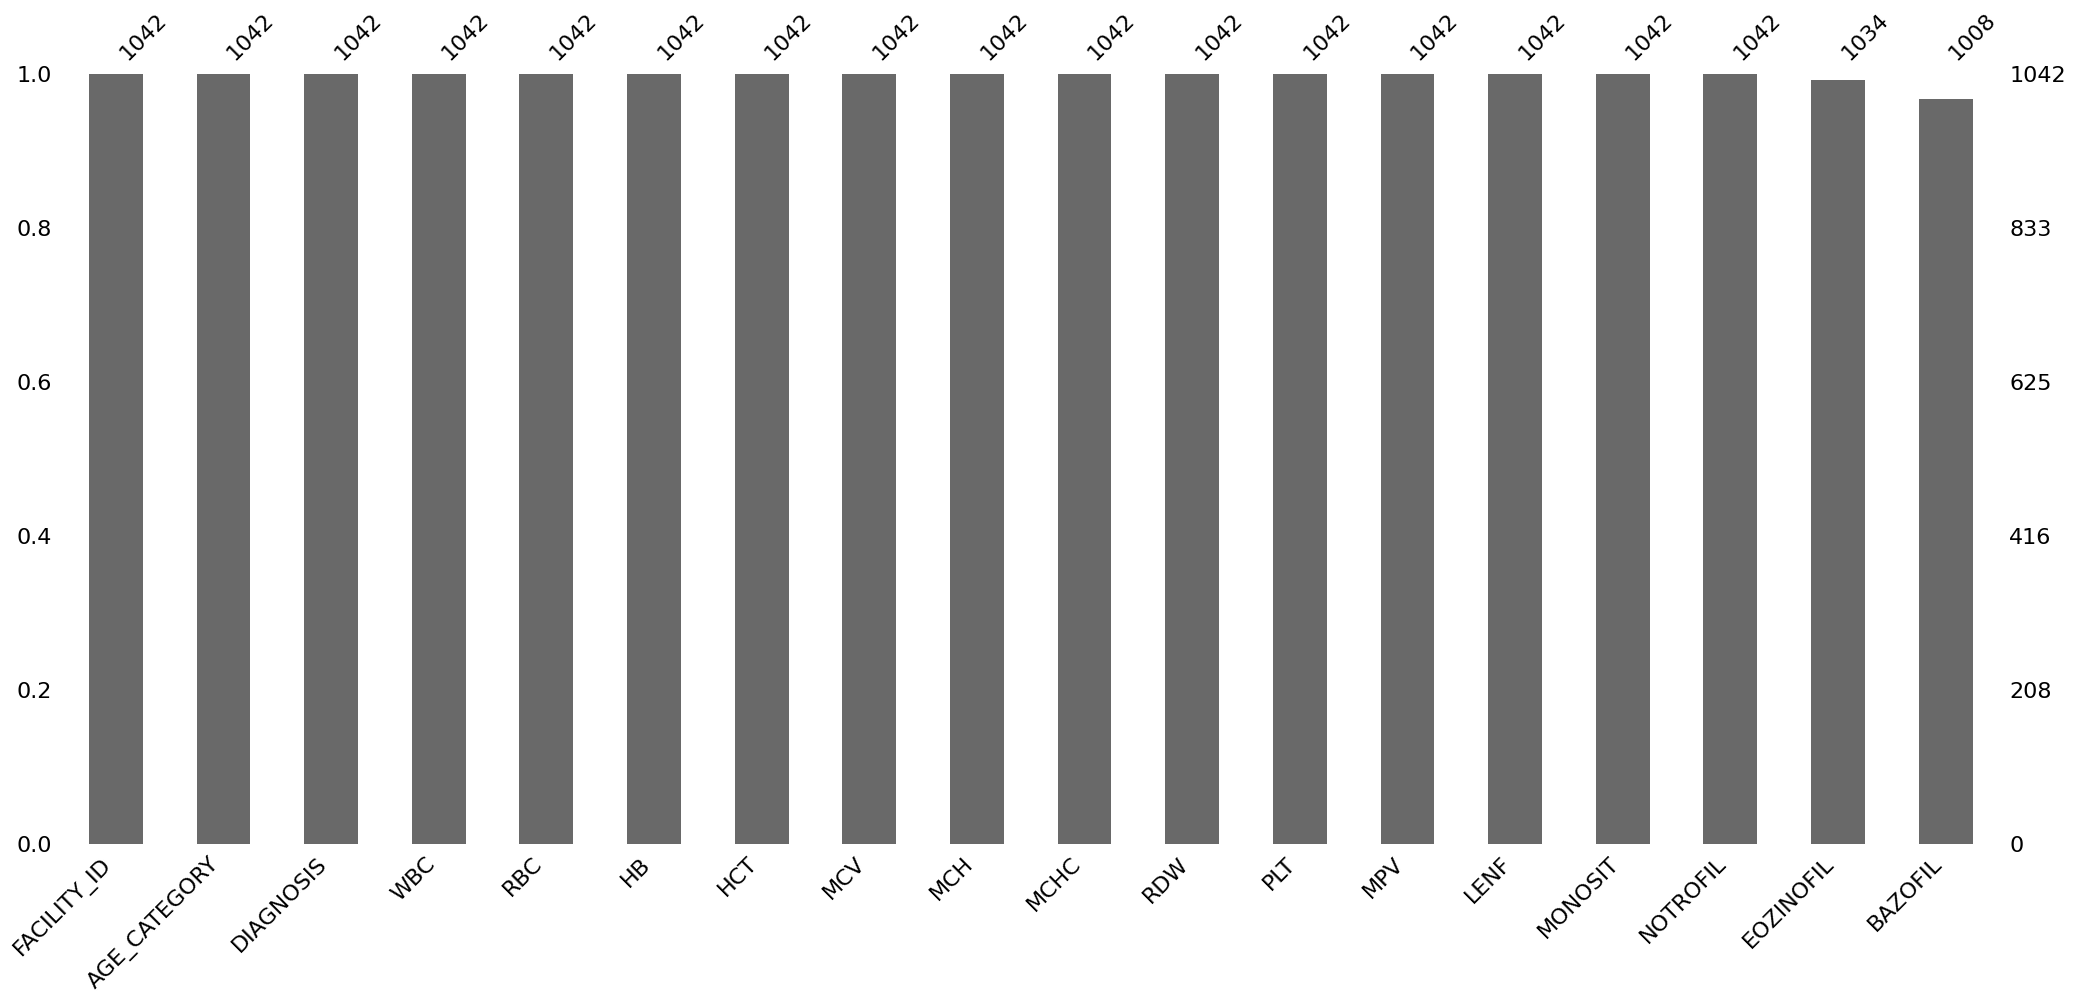

In [37]:
msno.bar(df);

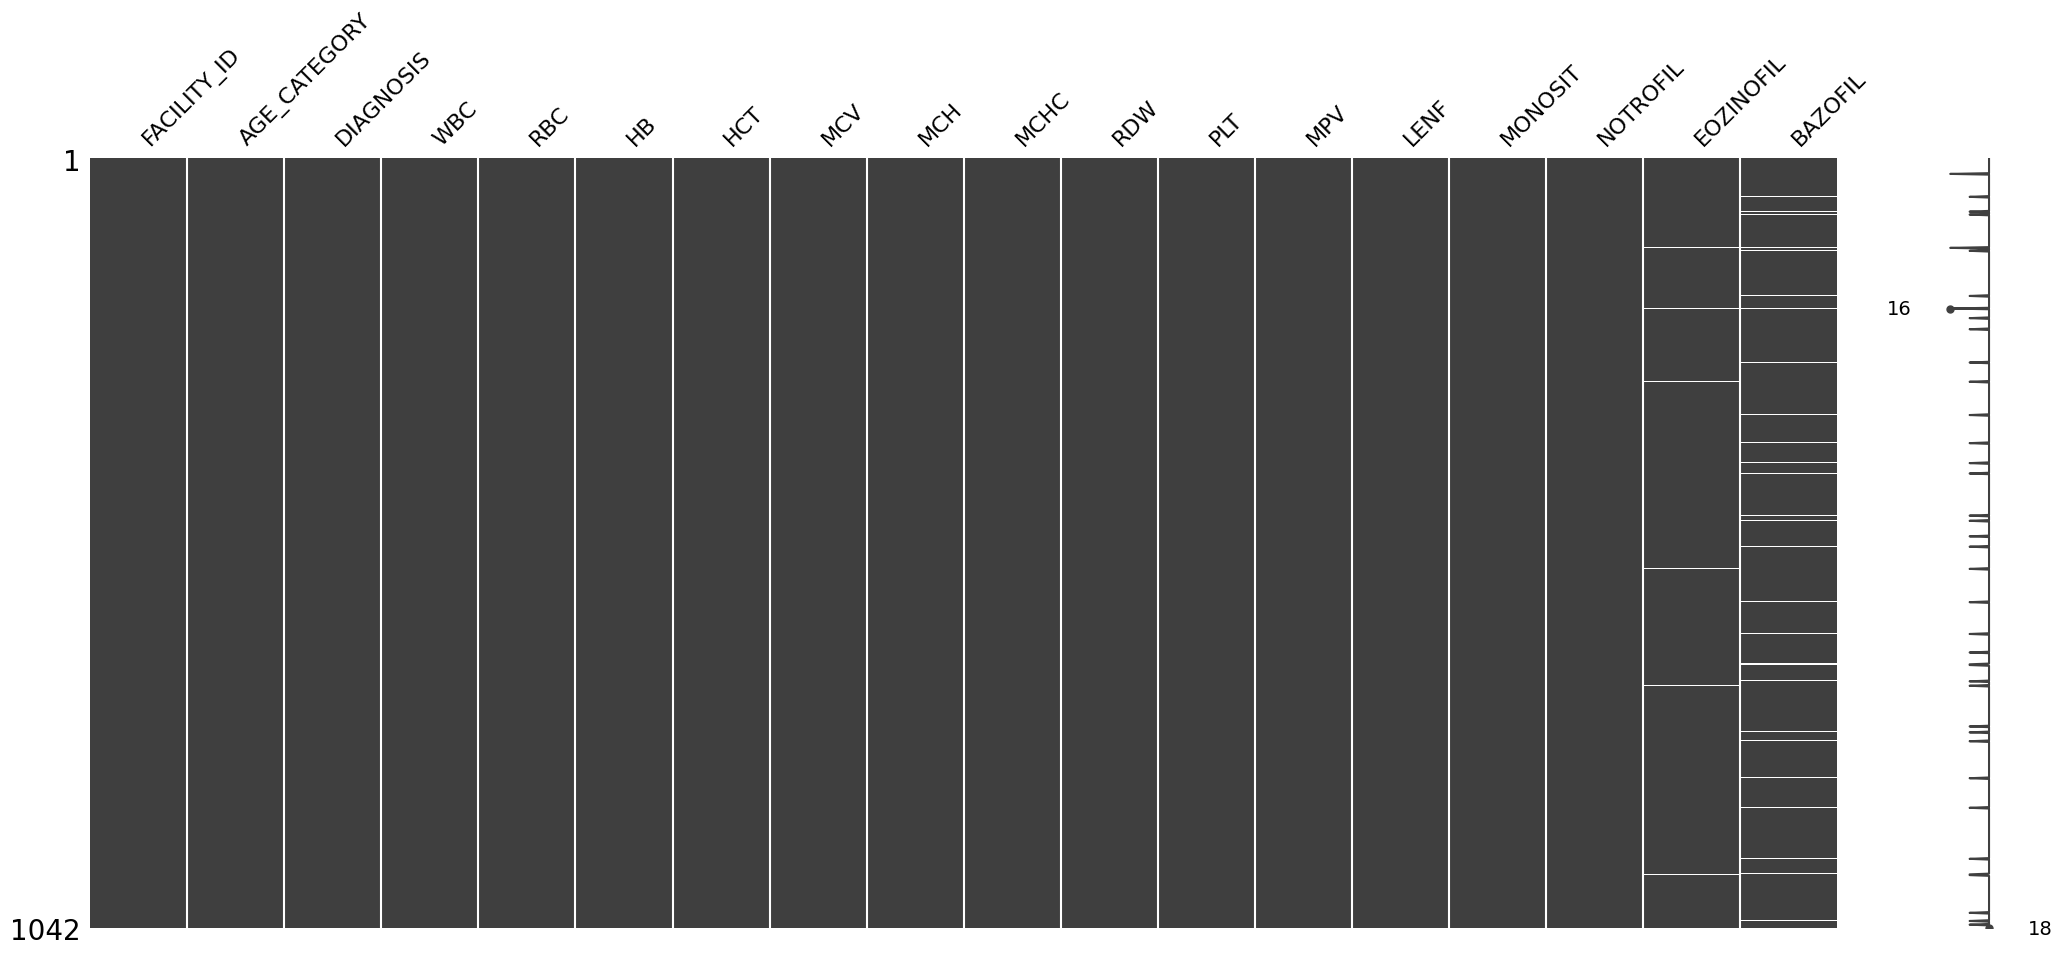

In [38]:
msno.matrix(df);

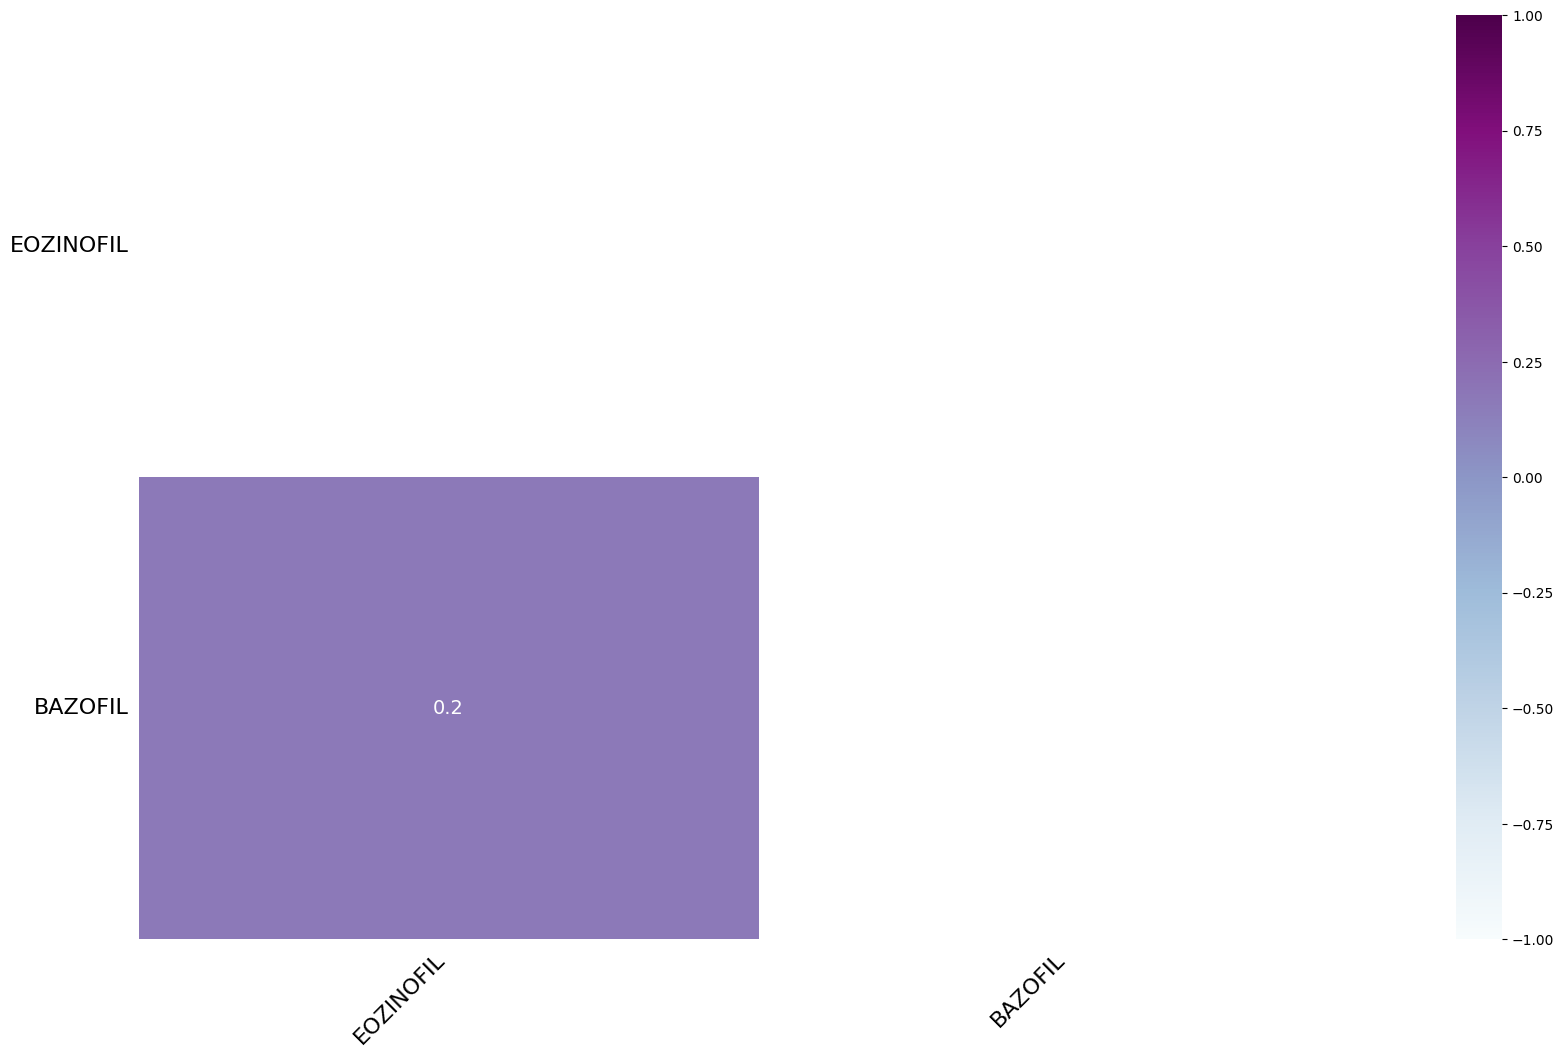

In [39]:
msno.heatmap(df,cmap="BuPu");

In [40]:
df = df.dropna()

In [41]:
check_df(df)

--------------------------------- SHAPE ---------------------------------
(1003, 18)
--------------------------------- INFO ---------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1041
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FACILITY_ID   1003 non-null   int64  
 1   AGE_CATEGORY  1003 non-null   int64  
 2   DIAGNOSIS     1003 non-null   int64  
 3   WBC           1003 non-null   float64
 4   RBC           1003 non-null   float64
 5   HB            1003 non-null   float64
 6   HCT           1003 non-null   float64
 7   MCV           1003 non-null   float64
 8   MCH           1003 non-null   float64
 9   MCHC          1003 non-null   float64
 10  RDW           1003 non-null   float64
 11  PLT           1003 non-null   float64
 12  MPV           1003 non-null   float64
 13  LENF          1003 non-null   float64
 14  MONOSIT       1003 non-null   float64
 15  NOTR

In [42]:
df.duplicated().sum()

0

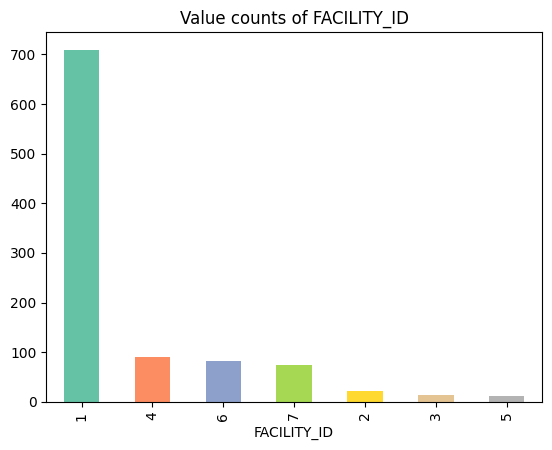

FACILITY_ID
1    709
4     90
6     83
7     74
2     21
3     14
5     12
Name: count, dtype: int64
---------------------------------------------




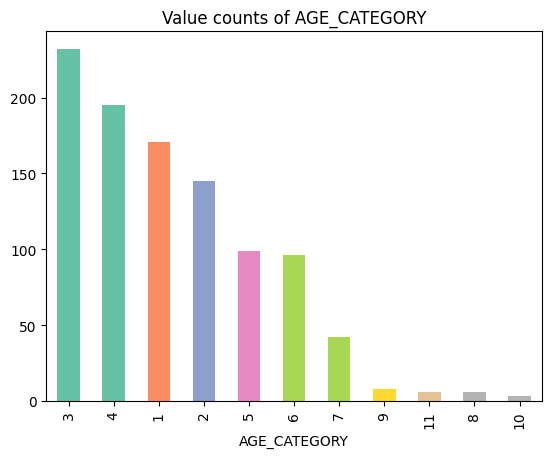

AGE_CATEGORY
3     232
4     195
1     171
2     145
5      99
6      96
7      42
9       8
11      6
8       6
10      3
Name: count, dtype: int64
---------------------------------------------




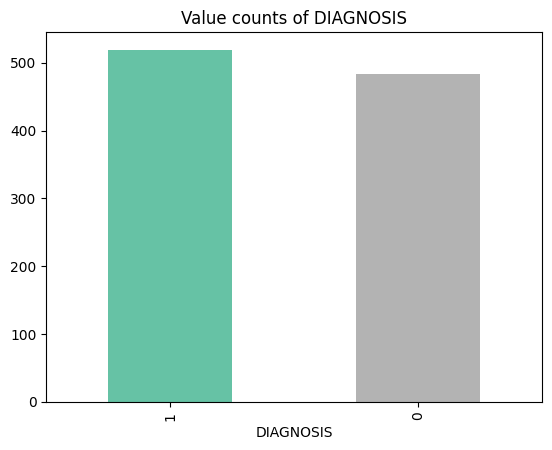

DIAGNOSIS
1    519
0    484
Name: count, dtype: int64
---------------------------------------------




In [43]:
for col in cat_cols:
    colormap = plt.get_cmap('Set2', len(df[col].value_counts()))
    df[col].value_counts().plot(kind="bar",color=colormap(np.arange(len(df[col].value_counts()))))
    plt.title(f"Value counts of {col}")
    plt.show()
    print(df[col].value_counts())
    print("---------------------------------------------",end="\n\n\n")

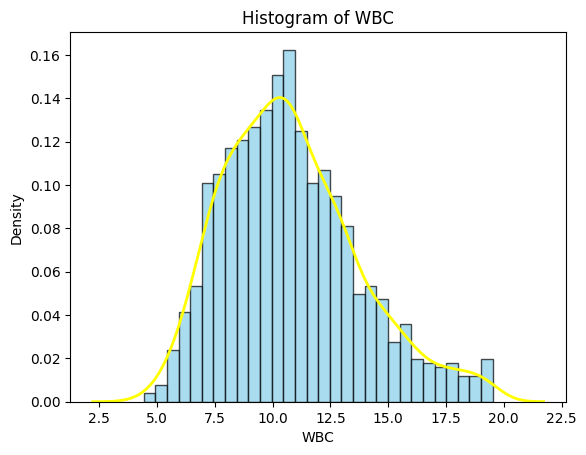

---------------------------------------------




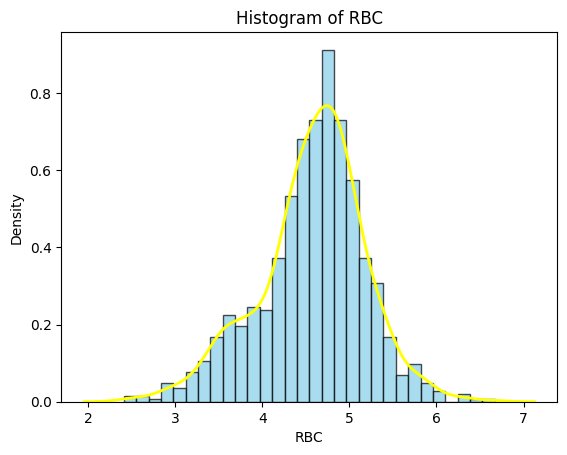

---------------------------------------------




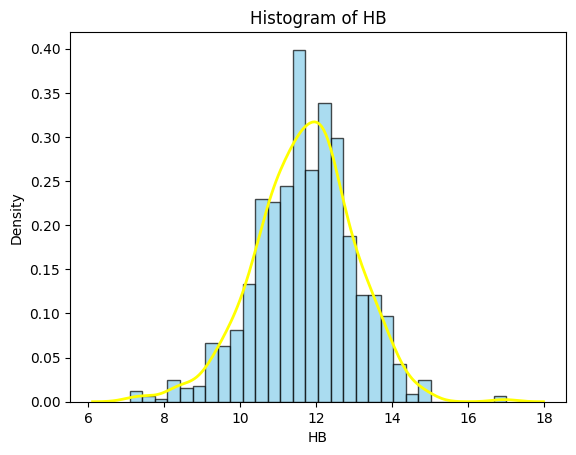

---------------------------------------------




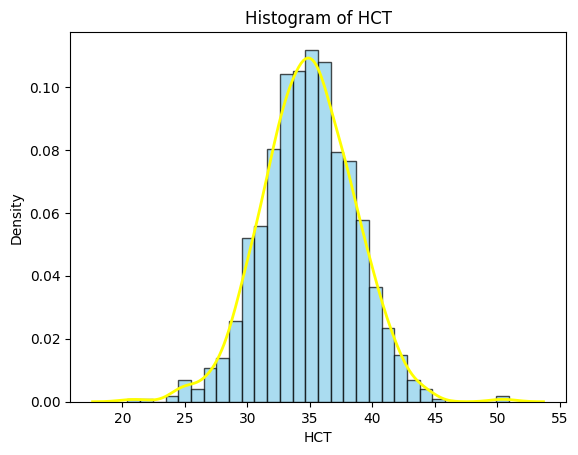

---------------------------------------------




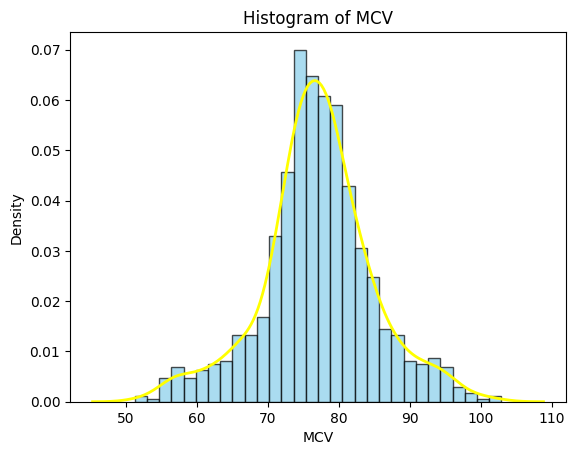

---------------------------------------------




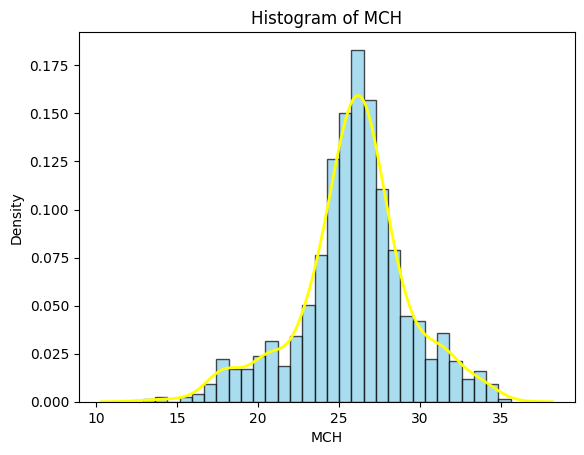

---------------------------------------------




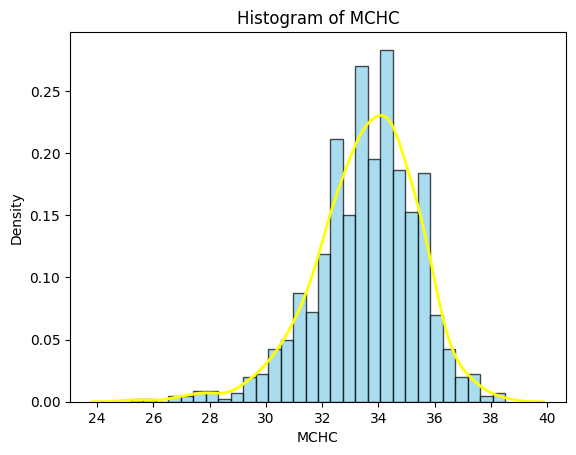

---------------------------------------------




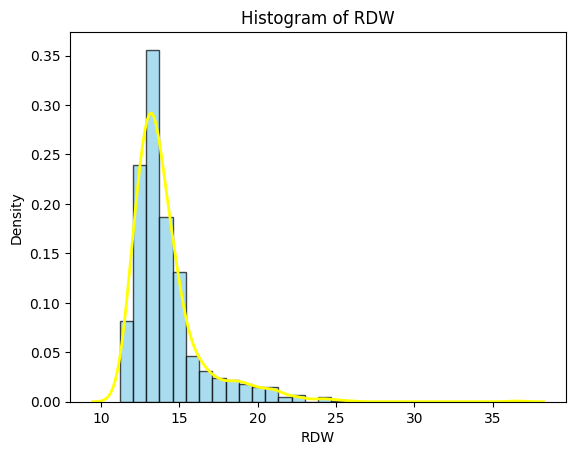

---------------------------------------------




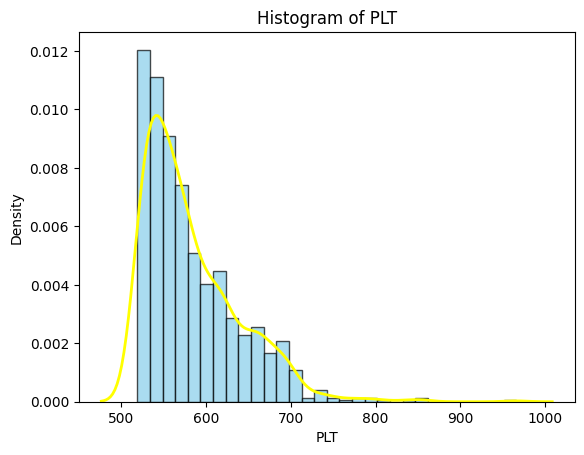

---------------------------------------------




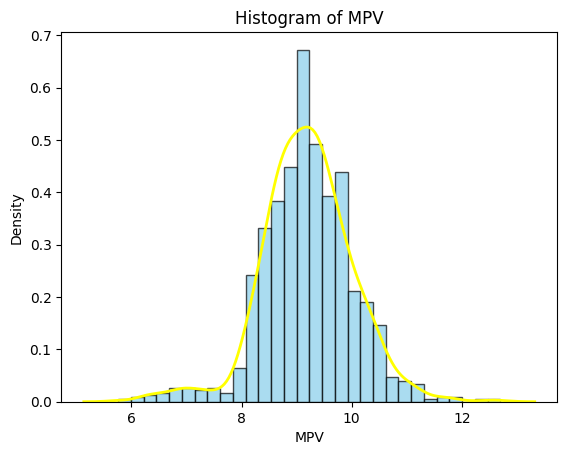

---------------------------------------------




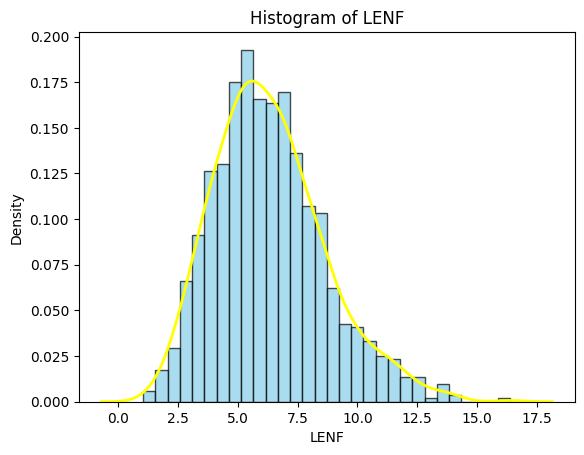

---------------------------------------------




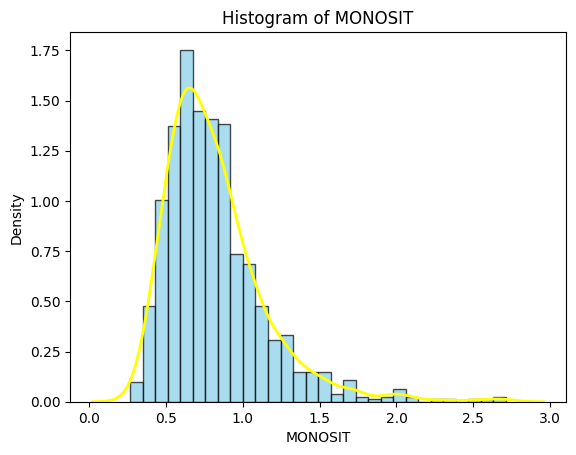

---------------------------------------------




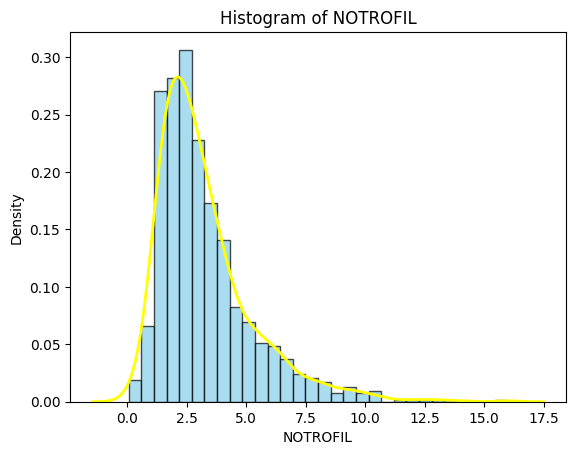

---------------------------------------------




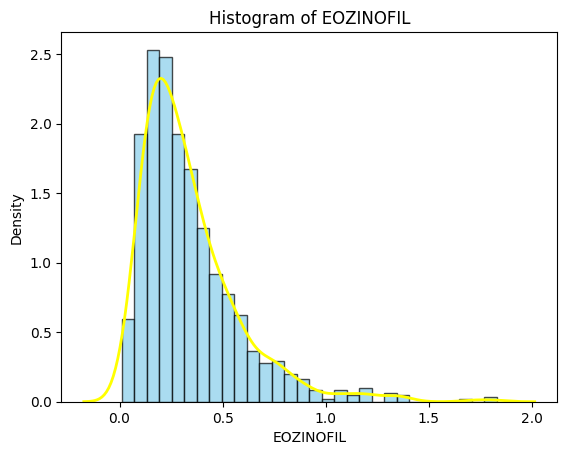

---------------------------------------------




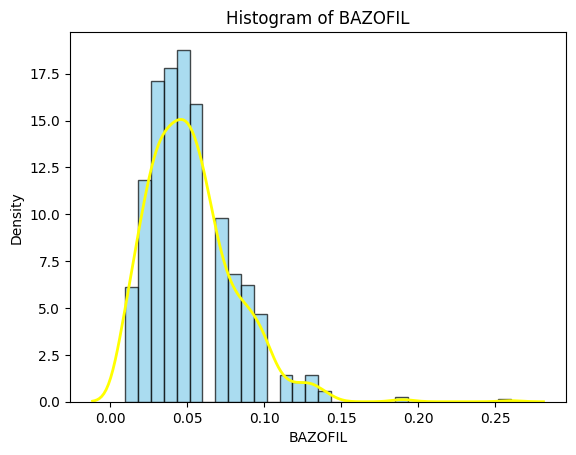

---------------------------------------------




In [44]:
for col in num_cols:
    plt.hist(df[col],bins=30,color='skyblue',alpha=0.7,edgecolor='black',density=True)
    sns.kdeplot(df[col], color='yellow', linewidth=2)
    plt.title(f"Histogram of {col}")
    plt.grid(False)
    plt.show()    
    print("---------------------------------------------",end="\n\n\n")

In [45]:
def target_summary_cat(df,target,cat_col):
    print(cat_col)
    print(pd.DataFrame({target+"_MEAN":df.groupby(cat_col)[target].mean(),
                       "Count":df[cat_col].value_counts(),
                        "Ratio":100*df[cat_col].value_counts()/len(df)}),end="\n\n")

In [46]:
cat_cols.remove("DIAGNOSIS")

In [47]:
for col in cat_cols:
    target_summary_cat(df,"DIAGNOSIS",col)

FACILITY_ID
             DIAGNOSIS_MEAN  Count  Ratio
FACILITY_ID                              
1                      0.51    709  70.69
2                      0.52     21   2.09
3                      0.57     14   1.40
4                      0.57     90   8.97
5                      0.58     12   1.20
6                      0.46     83   8.28
7                      0.61     74   7.38

AGE_CATEGORY
              DIAGNOSIS_MEAN  Count  Ratio
AGE_CATEGORY                              
1                       0.49    171  17.05
2                       0.50    145  14.46
3                       0.52    232  23.13
4                       0.54    195  19.44
5                       0.55     99   9.87
6                       0.50     96   9.57
7                       0.52     42   4.19
8                       0.00      6   0.60
9                       1.00      8   0.80
10                      0.00      3   0.30
11                      1.00      6   0.60



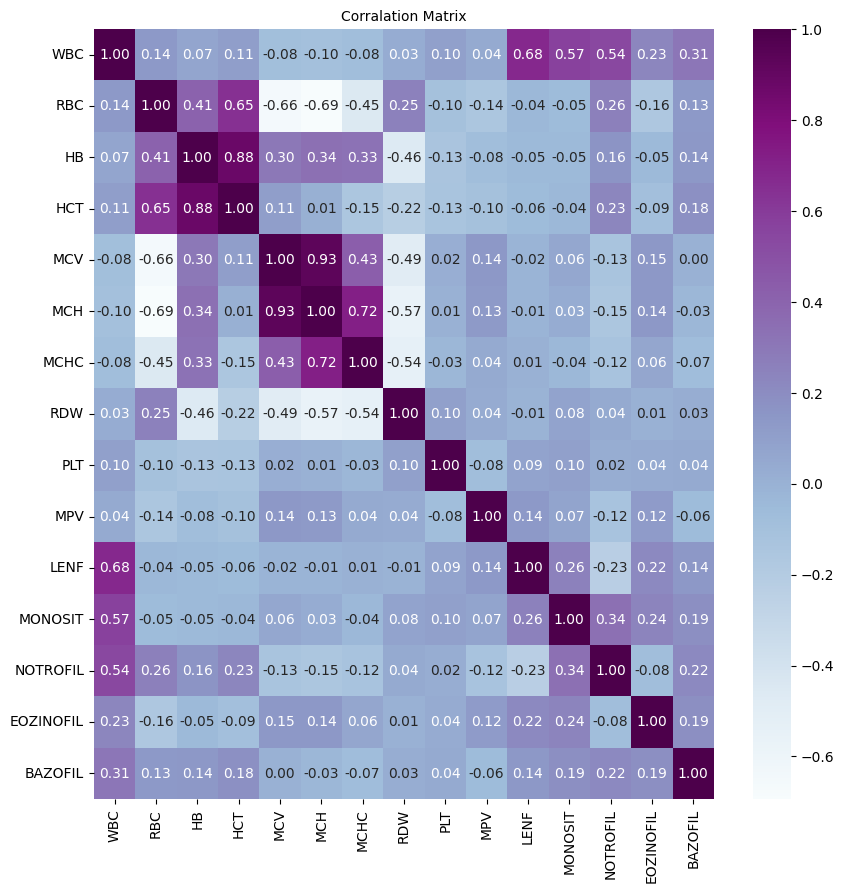

In [48]:
f,ax = plt.subplots(figsize=[10,10])
sns.heatmap(df[num_cols].corr(),annot=True,fmt=".2f",ax=ax,cmap="BuPu")
ax.set_title("Corralation Matrix",fontsize=10)
plt.show()

In [49]:
def outlier_thresholds(data,col_name,q1=0.10,q3=0.90):
  quantile1 = data[col_name].quantile(q1)
  quantile3 = data[col_name].quantile(q3)
  interquantile_range = quantile3 - quantile1
  up_limit = quantile3 + 1.5 * interquantile_range
  low_limit = quantile1 - 1.5 * interquantile_range
  return low_limit , up_limit

In [50]:
def check_outlier(data,col_name):
  low_limit,up_limit = outlier_thresholds(data,col_name)
  if data[(data[col_name]>up_limit)| (data[col_name]<low_limit)].any(axis=None):
    return True
  else:
    return False

In [51]:
def outlier_count(data, col_name):
    low_limit, up_limit = outlier_thresholds(data, col_name)
    outliers = data[(data[col_name] > up_limit) | (data[col_name] < low_limit)]
    return len(outliers)

In [52]:
def replace_with_thresholds(df,variable):
  low_limit,up_limit = outlier_thresholds(df,variable)
  df.loc[(df[variable]<low_limit),variable] = low_limit
  df.loc[(df[variable]>up_limit),variable] = up_limit

In [53]:
def remove_outliers(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)    
    df.drop(df[(df[variable] < low_limit) | (df[variable] > up_limit)].index, inplace=True)
    df.reset_index(drop=True, inplace=True)  
    return df

In [54]:
for col in num_cols:
    print(col,check_outlier(df,col))

WBC False
RBC False
HB False
HCT False
MCV False
MCH False
MCHC False
RDW True
PLT True
MPV False
LENF False
MONOSIT True
NOTROFIL True
EOZINOFIL True
BAZOFIL True


In [55]:
for col in num_cols:
    print(col,outlier_count(df,col))

WBC 0
RBC 0
HB 0
HCT 0
MCV 0
MCH 0
MCHC 0
RDW 6
PLT 1
MPV 0
LENF 0
MONOSIT 5
NOTROFIL 3
EOZINOFIL 3
BAZOFIL 1


In [56]:
for col in num_cols:
    remove_outliers(df, col)

In [57]:
for col in num_cols:
    print(col,outlier_count(df,col))

WBC 0
RBC 0
HB 0
HCT 0
MCV 0
MCH 0
MCHC 0
RDW 1
PLT 0
MPV 0
LENF 0
MONOSIT 0
NOTROFIL 0
EOZINOFIL 0
BAZOFIL 0


In [58]:
for col in num_cols:
    remove_outliers(df, col)

In [59]:
for col in num_cols:
    print(col,outlier_count(df,col))

WBC 0
RBC 0
HB 0
HCT 0
MCV 0
MCH 0
MCHC 0
RDW 0
PLT 0
MPV 0
LENF 0
MONOSIT 0
NOTROFIL 0
EOZINOFIL 0
BAZOFIL 0


In [60]:
check_df(df)

--------------------------------- SHAPE ---------------------------------
(983, 18)
--------------------------------- INFO ---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FACILITY_ID   983 non-null    int64  
 1   AGE_CATEGORY  983 non-null    int64  
 2   DIAGNOSIS     983 non-null    int64  
 3   WBC           983 non-null    float64
 4   RBC           983 non-null    float64
 5   HB            983 non-null    float64
 6   HCT           983 non-null    float64
 7   MCV           983 non-null    float64
 8   MCH           983 non-null    float64
 9   MCHC          983 non-null    float64
 10  RDW           983 non-null    float64
 11  PLT           983 non-null    float64
 12  MPV           983 non-null    float64
 13  LENF          983 non-null    float64
 14  MONOSIT       983 non-null    float64
 15  NO

In [61]:
df.groupby("DIAGNOSIS")[num_cols].mean()

,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL
DIAGNOSIS,,,,,,,,,,,,,,,
0,10.60,4.58,11.60,34.58,76.28,25.68,33.57,14.23,582.15,9.18,6.25,0.83,3.14,0.35,0.05
1,10.78,4.57,11.83,35.22,77.74,26.20,33.64,13.90,582.34,9.21,6.38,0.79,3.25,0.32,0.05


In [62]:
df.groupby("DIAGNOSIS")[num_cols].median()

,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL
DIAGNOSIS,,,,,,,,,,,,,,,
0,10.30,4.64,11.70,34.60,76.05,25.90,33.70,13.60,565.00,9.10,6.03,0.77,2.66,0.29,0.05
1,10.62,4.63,11.80,35.20,77.60,26.30,33.80,13.40,566.00,9.20,6.17,0.73,2.80,0.26,0.05


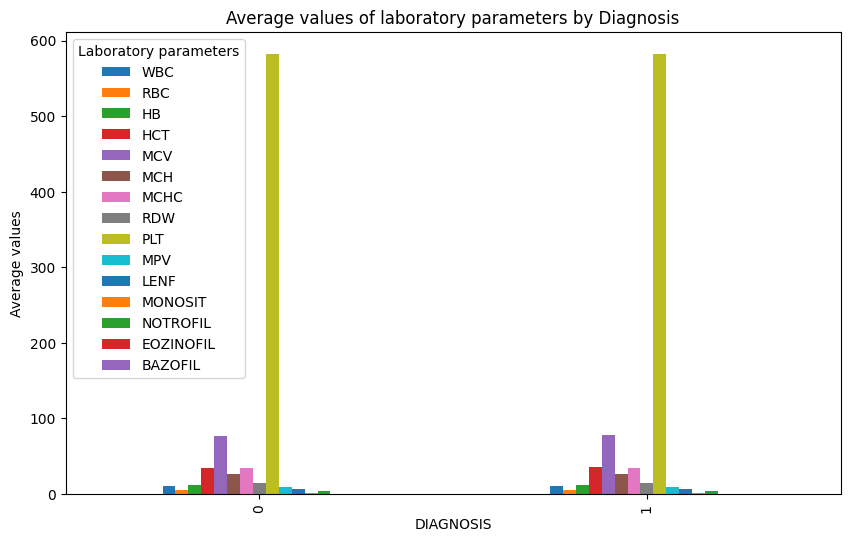

In [63]:
grouped_df2 = df.groupby("DIAGNOSIS")[num_cols].mean()
grouped_df2.plot(kind="bar",figsize=(10,6))
plt.title("Average values of laboratory parameters by Diagnosis")
plt.xlabel("DIAGNOSIS")
plt.ylabel("Average values")
plt.legend(title="Laboratory parameters",loc="upper left")
plt.show()

In [64]:
df.groupby("AGE_CATEGORY").agg({"DIAGNOSIS":"value_counts"})

DIAGNOSIS
AGE_CATEGORY DIAGNOSIS           
1            0                 87
             1                 81
2            0                 73
             1                 71
3            1                119
             0                109
4            1                101
             0                 88
5            1                 52
             0                 44
6            0                 47
             1                 47
7            1                 22
             0                 19
8            0                  6
9            1                  8
10           0                  3
11           1                  6

In [65]:
df.groupby(["FACILITY_ID"]).agg({"DIAGNOSIS":"mean"})

,DIAGNOSIS
FACILITY_ID,
1,0.50
2,0.55
3,0.57
4,0.57
5,0.58
6,0.45
7,0.61


In [66]:
df.groupby(["FACILITY_ID"])[num_cols].mean()

,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL
FACILITY_ID,,,,,,,,,,,,,,,
1,10.60,4.61,11.78,35.10,76.70,25.82,33.59,13.99,579.64,9.24,6.21,0.79,3.21,0.33,0.05
2,11.94,4.81,12.05,37.13,77.99,25.37,32.47,14.03,574.60,9.28,6.00,0.94,4.66,0.30,0.04
3,9.65,4.56,11.92,34.93,76.88,26.29,34.17,13.19,569.64,9.32,5.51,0.71,3.12,0.28,0.04
4,10.87,4.51,11.68,34.84,78.26,26.27,33.48,14.51,590.60,8.33,6.45,0.87,3.13,0.36,0.06
5,10.59,4.56,11.82,35.55,78.66,26.22,33.28,13.84,601.50,9.17,6.72,0.77,3.00,0.38,0.05
6,10.96,4.36,11.45,34.12,79.24,26.76,33.66,14.69,599.63,9.62,7.08,0.82,2.71,0.37,0.05
7,10.98,4.42,11.36,33.27,75.86,25.96,34.14,13.69,579.64,9.30,6.50,0.83,3.27,0.33,0.05


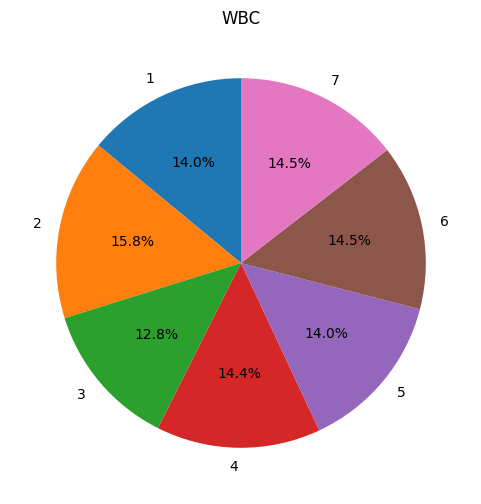

-------------------------------------------------------------------------



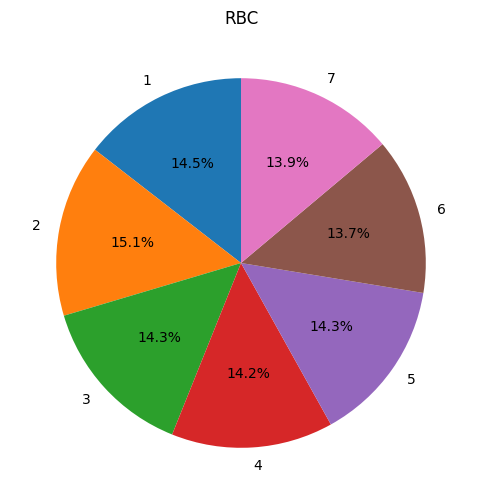

-------------------------------------------------------------------------



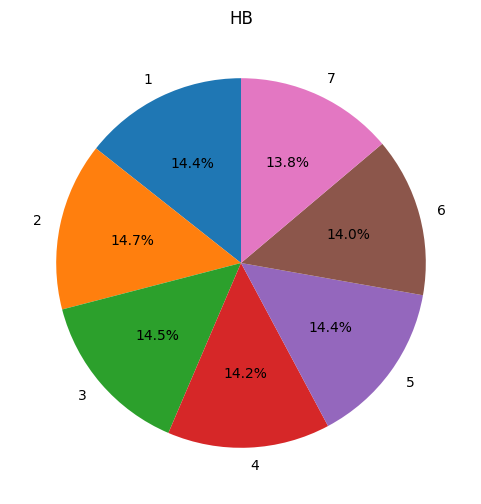

-------------------------------------------------------------------------



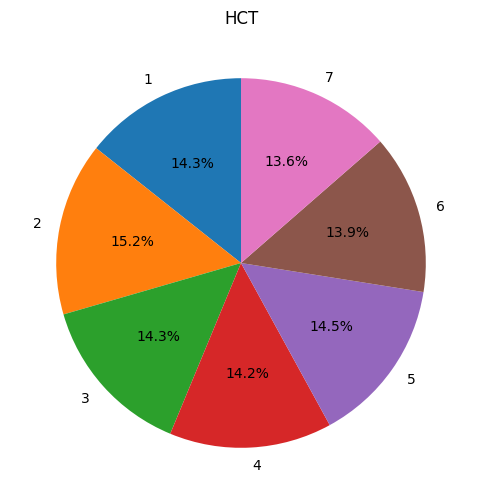

-------------------------------------------------------------------------



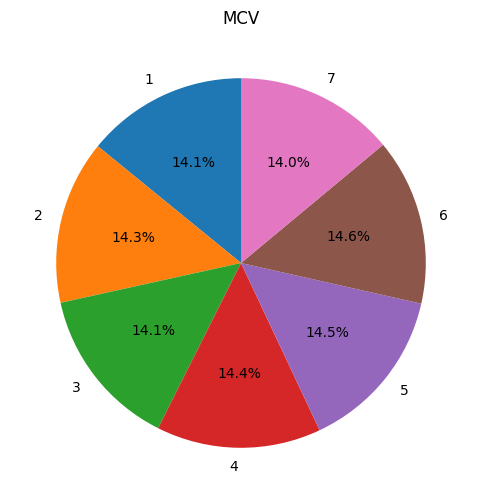

-------------------------------------------------------------------------



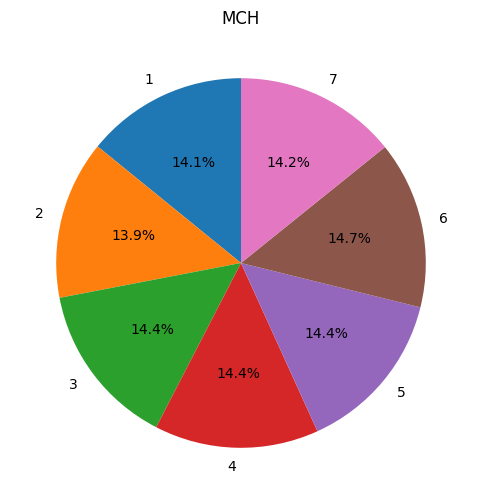

-------------------------------------------------------------------------



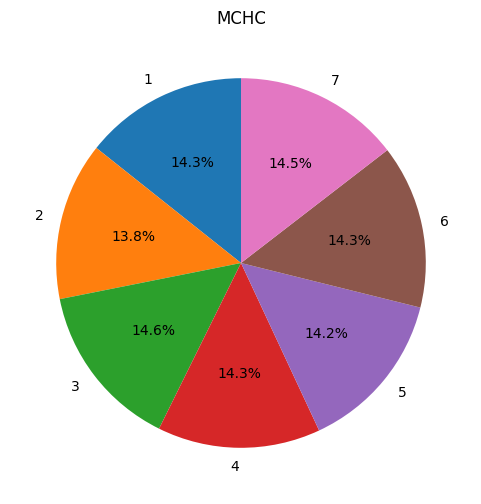

-------------------------------------------------------------------------



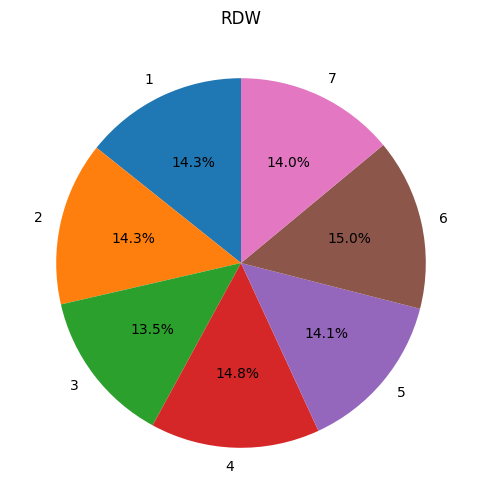

-------------------------------------------------------------------------



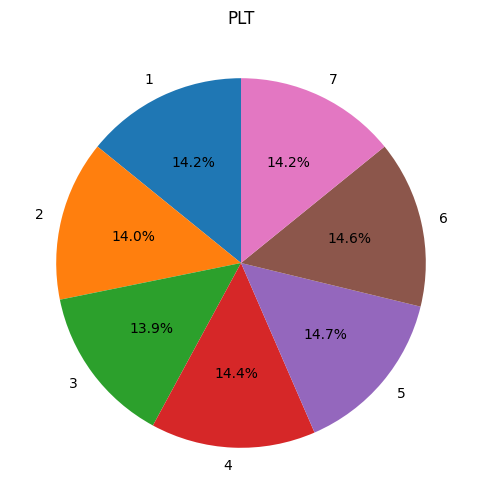

-------------------------------------------------------------------------



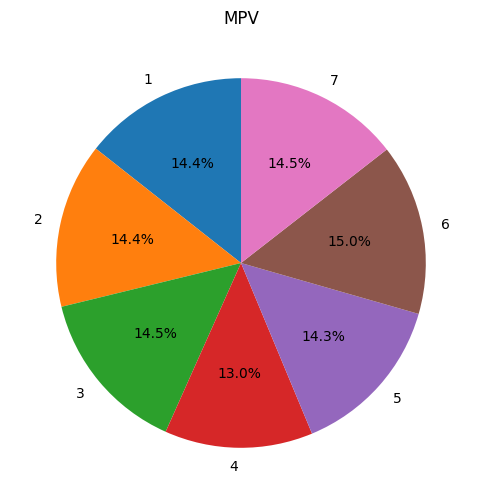

-------------------------------------------------------------------------



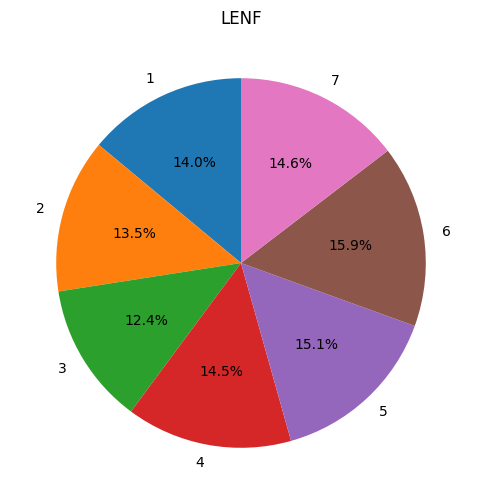

-------------------------------------------------------------------------



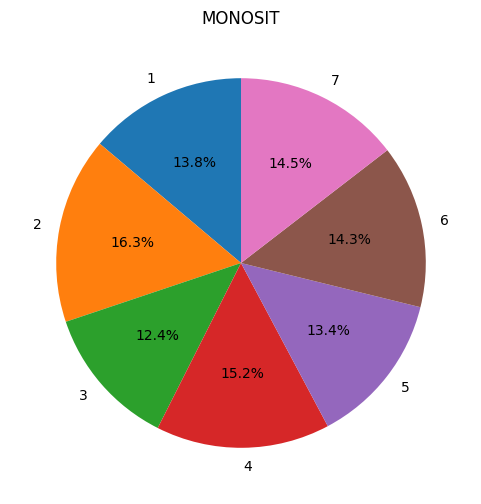

-------------------------------------------------------------------------



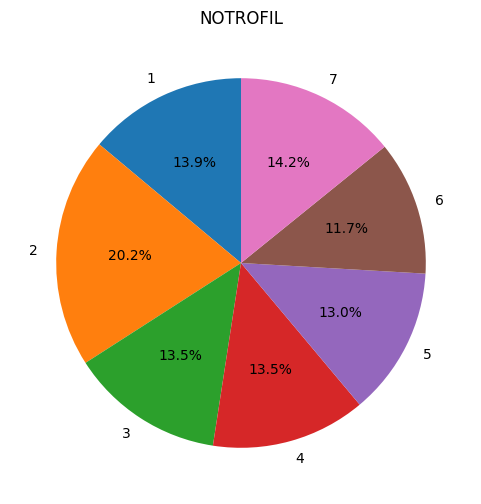

-------------------------------------------------------------------------



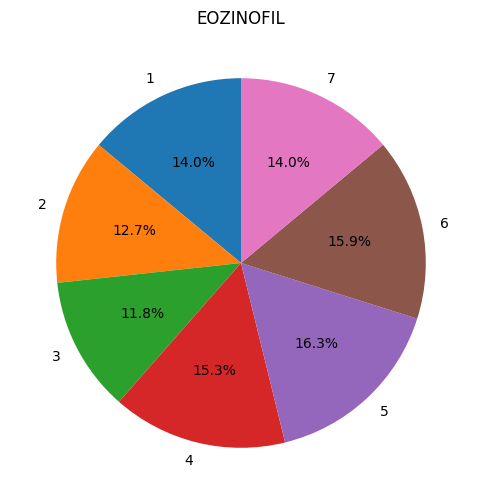

-------------------------------------------------------------------------



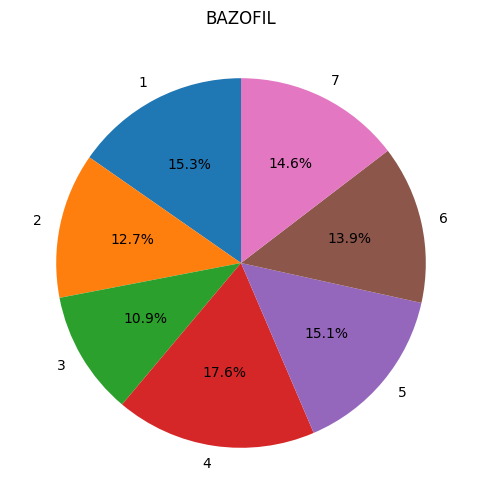

-------------------------------------------------------------------------



In [67]:
grouped_df = df.groupby(["FACILITY_ID"])[num_cols].mean()
for col in num_cols:
    plt.figure(figsize=(6,6))
    plt.pie(grouped_df[col],labels=grouped_df.index,autopct='%1.1f%%',startangle=90)
    plt.title(col)
    plt.show()
    print("-------------------------------------------------------------------------",end="\n\n")

In [68]:
df.groupby(["DIAGNOSIS","AGE_CATEGORY"])[num_cols].mean()

WBC  RBC    HB   HCT   MCV   MCH  MCHC   RDW    PLT  MPV  LENF  MONOSIT  NOTROFIL  EOZINOFIL  BAZOFIL
DIAGNOSIS AGE_CATEGORY                                                                                                        
0         1            10.27 3.80 11.07 31.95 84.49 29.28 34.66 13.69 591.69 9.62  6.58     0.94      2.22       0.45     0.04
          2            10.64 4.51 11.32 33.43 74.24 25.16 33.87 13.58 579.04 9.16  7.15     0.80      2.38       0.38     0.04
          3            11.33 4.75 11.31 34.03 72.12 24.02 33.21 14.67 583.07 9.12  7.26     0.84      2.87       0.36     0.05
          4            11.09 4.73 11.57 34.77 74.14 24.77 33.27 14.88 587.66 8.90  6.38     0.85      3.46       0.33     0.06
          5             9.82 4.85 11.93 36.16 75.35 24.94 33.00 14.50 563.64 9.09  5.17     0.76      3.53       0.30     0.06
          6             9.75 4.94 12.58 38.07 77.37 25.60 33.04 13.99 577.87 9.09  4.24     0.73      4.48       0.24     0.05
          7            10.58 4.75 12.83 37.61 79.93 27.23 34.09 13.57 592.58 9.11  3.92     0.72      5.54       0.35     0.05
          8             8.90 5.45 13.37 41.48 77.10 24.95 32.20 14.02 544.67 9.48  3.41     0.77      4.54       0.15     0.04
          10            7.10 5.63 14.07 41.93 74.37 24.93 33.37 14.17 534.00 9.37  2.61     0.55      3.77       0.13     0.04
1         1            10.41 3.77 11.30 32.44 86.34 30.11 34.86 13.74 593.66 9.64  7.06     0.87      1.99       0.45     0.05
          2            10.79 4.53 11.85 34.78 76.88 26.19 34.08 12.77 586.75 9.39  7.01     0.79      2.63       0.36     0.05
          3            11.64 4.75 11.70 35.09 74.29 24.81 33.37 14.01 579.02 9.29  7.44     0.81      2.99       0.31     0.05
          4            11.44 4.69 11.76 35.67 76.39 25.27 33.01 14.57 581.96 8.91  6.83     0.80      3.45       0.30     0.06
          5            10.03 4.83 12.30 36.67 76.63 25.75 33.52 13.93 584.95 8.95  5.05     0.72      3.94       0.25     0.06
          6             9.88 4.86 12.45 37.18 76.77 25.77 33.50 13.89 569.58 8.83  4.30     0.68      4.60       0.24     0.06
          7             9.76 4.84 12.96 38.69 80.19 26.86 33.56 13.13 578.75 9.23  3.92     0.71      4.79       0.27     0.07
          9             8.59 4.78 11.53 35.66 74.71 24.18 32.14 14.91 543.75 9.32  2.74     0.67      4.99       0.15     0.04
          11            7.91 4.32 10.13 31.55 75.50 24.45 32.33 16.98 591.83 9.60  2.58     0.56      4.57       0.13     0.07

<Figure size 1000x600 with 0 Axes>

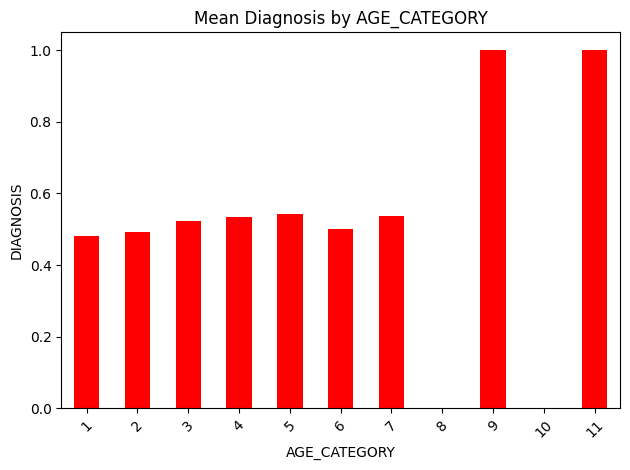

In [69]:
grouped_df4 = df.groupby(["AGE_CATEGORY"]).agg({"DIAGNOSIS":"mean"})
plt.figure(figsize=(10,6))
grouped_df4.plot(kind="bar",legend=False,color="r")
plt.title("Mean Diagnosis by AGE_CATEGORY")
plt.xlabel("AGE_CATEGORY")
plt.ylabel("DIAGNOSIS")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# AB TESTING

In [70]:
df_diagnosis0 = df[df["DIAGNOSIS"]==0]
df_diagnosis1 = df[df["DIAGNOSIS"]==1]

In [71]:
print(f"Diagnosis 0 shape: {df_diagnosis0.shape}")
print(f"Diagnosis 1 shape: {df_diagnosis1.shape}")

Diagnosis 0 shape: (476, 18)
Diagnosis 1 shape: (507, 18)


In [72]:
df_diagnosis1 = df_diagnosis1.sample(476)

In [73]:
print(f"Diagnosis 0 shape: {df_diagnosis0.shape}")
print(f"Diagnosis 1 shape: {df_diagnosis1.shape}")

Diagnosis 0 shape: (476, 18)
Diagnosis 1 shape: (476, 18)


In [74]:
df_diagnosis1.columns = [col+"_1" for col in df_diagnosis1.columns]

In [75]:
df_diagnosis1.head()

,FACILITY_ID_1,AGE_CATEGORY_1,DIAGNOSIS_1,WBC_1,RBC_1,HB_1,HCT_1,MCV_1,MCH_1,MCHC_1,RDW_1,PLT_1,MPV_1,LENF_1,MONOSIT_1,NOTROFIL_1,EOZINOFIL_1,BAZOFIL_1
124,1,3,1,12.63,4.96,13.50,40.50,81.70,27.20,33.30,13.00,529.00,8.80,7.73,0.67,4.07,0.12,0.04
166,1,3,1,13.53,4.99,12.30,35.50,71.10,24.60,34.60,14.50,533.00,8.70,5.09,1.00,7.14,0.22,0.08
88,1,6,1,7.21,3.57,9.50,27.70,77.60,26.60,34.30,11.90,526.00,8.50,2.20,0.66,4.23,0.10,0.02
533,6,1,1,11.50,3.68,12.60,35.90,97.60,34.20,35.10,15.90,572.00,11.30,8.54,0.67,1.71,0.53,0.05
123,1,4,1,11.08,5.54,9.80,36.30,65.50,17.70,27.00,21.10,529.00,8.20,6.89,1.01,2.29,0.83,0.06


In [76]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : p-value{:.4f}".format(column, skew, skewtest[1]))
    plt.show()    

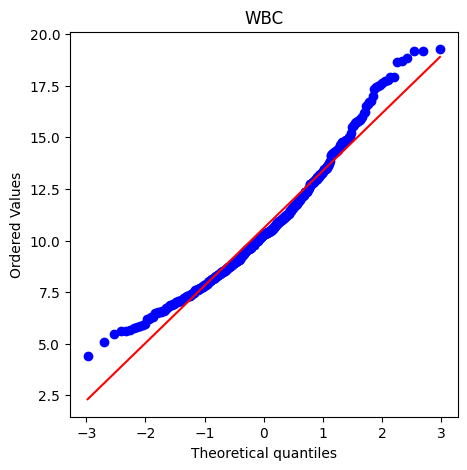

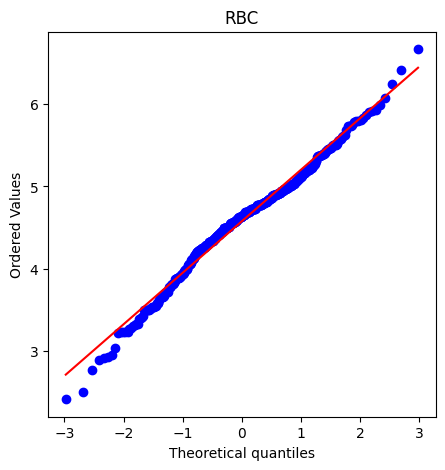

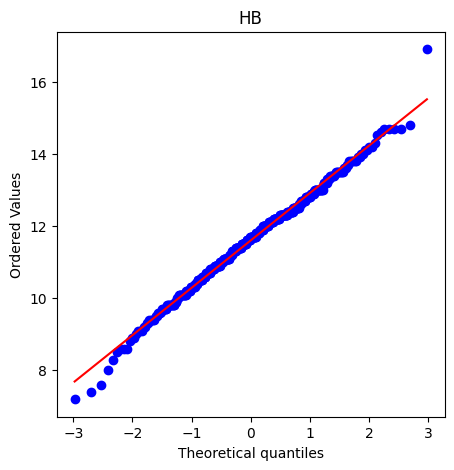

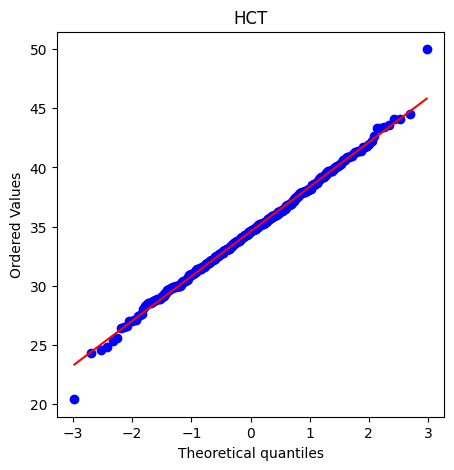

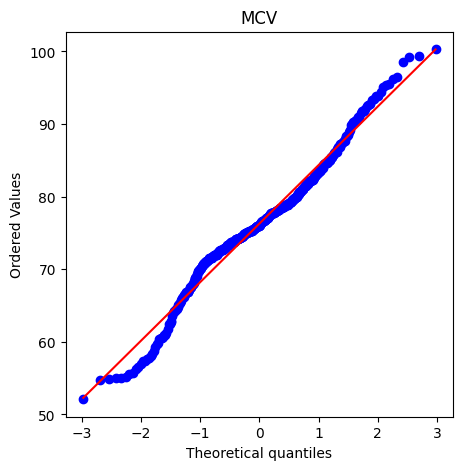

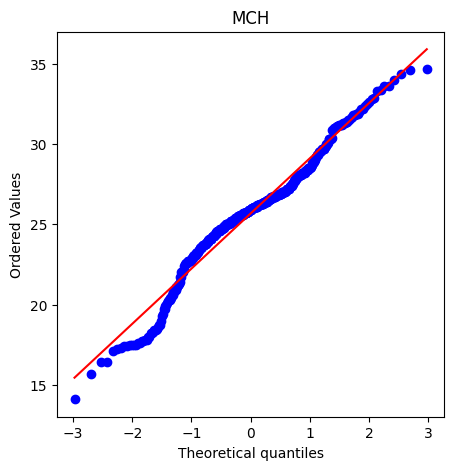

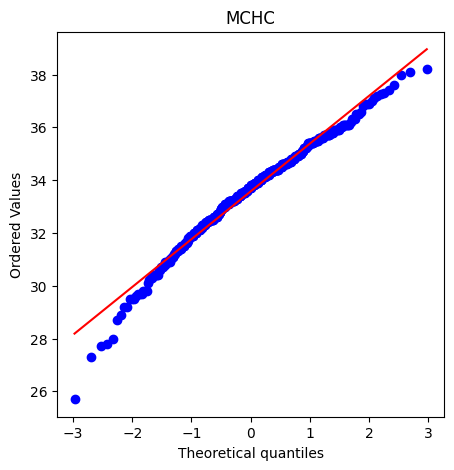

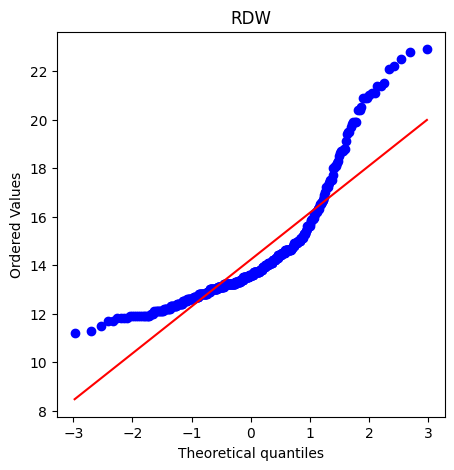

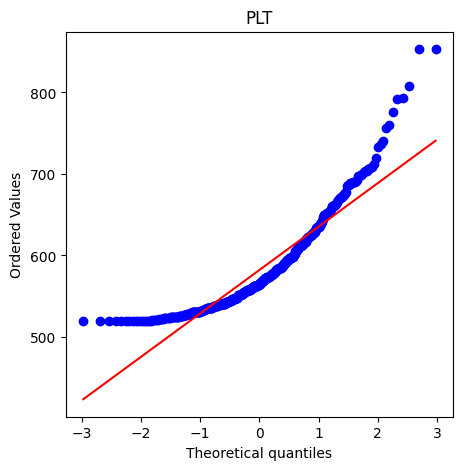

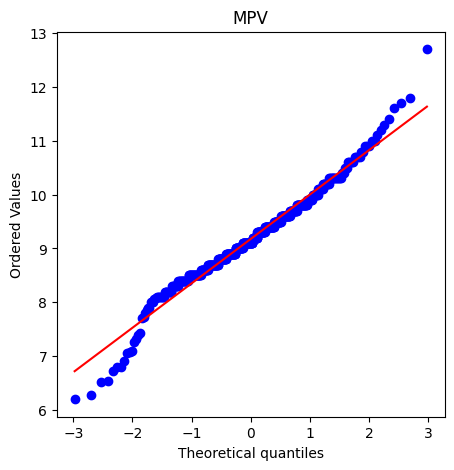

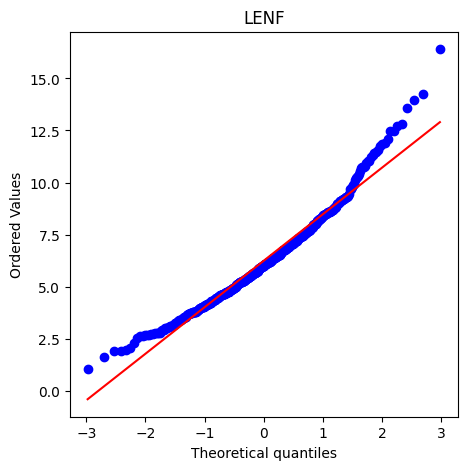

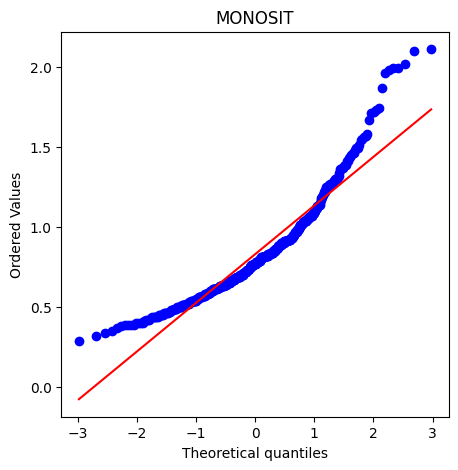

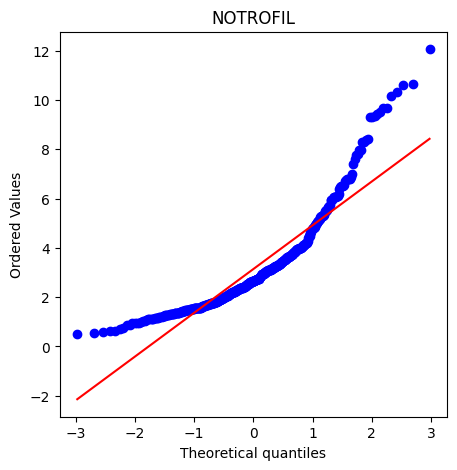

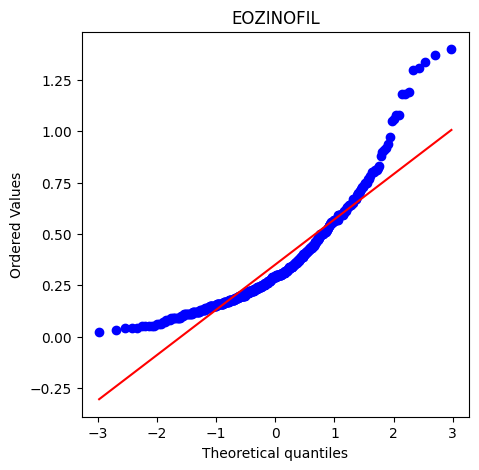

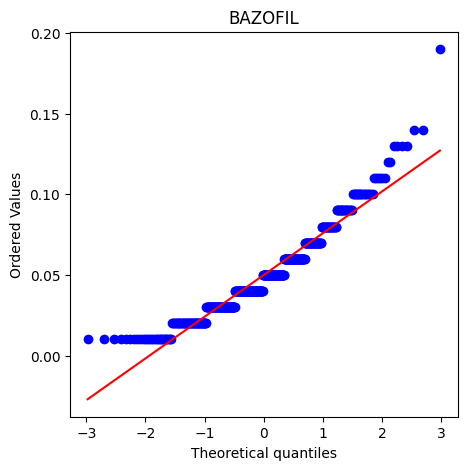

In [77]:
for col in num_cols:
    plt.figure(figsize=(5,5))
    stats.probplot(df_diagnosis0[col],dist="norm",plot=pylab)
    plt.title(col)
    plt.show()

WBC's: Skew: 0.6880561746957626, : p-value0.0000


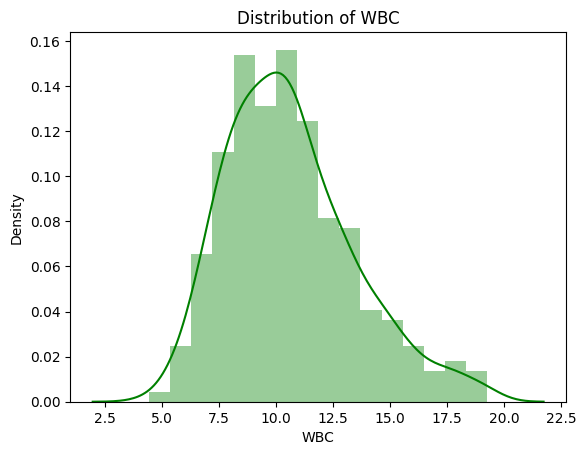

RBC's: Skew: -0.28611266387772055, : p-value0.0111


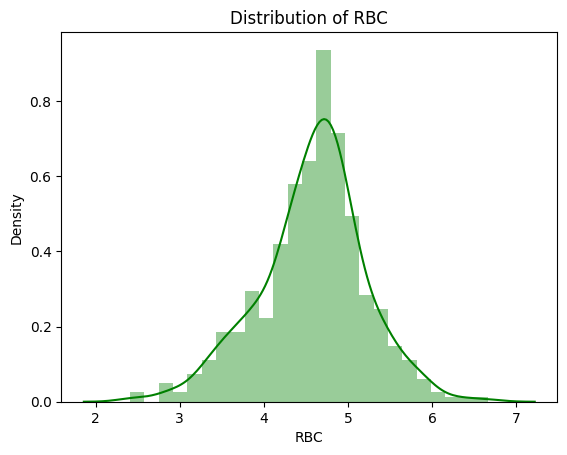

HB's: Skew: -0.10052793882892984, : p-value0.3645


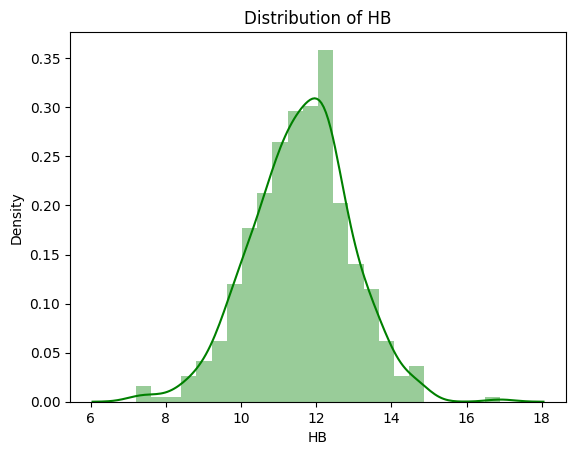

HCT's: Skew: 0.05686555864923353, : p-value0.6074


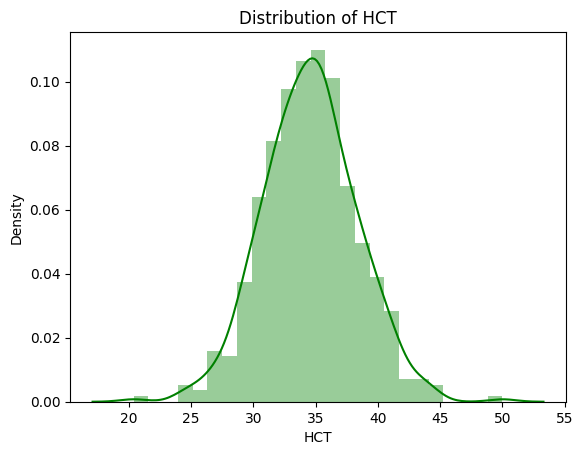

MCV's: Skew: -0.10687877553567397, : p-value0.3351


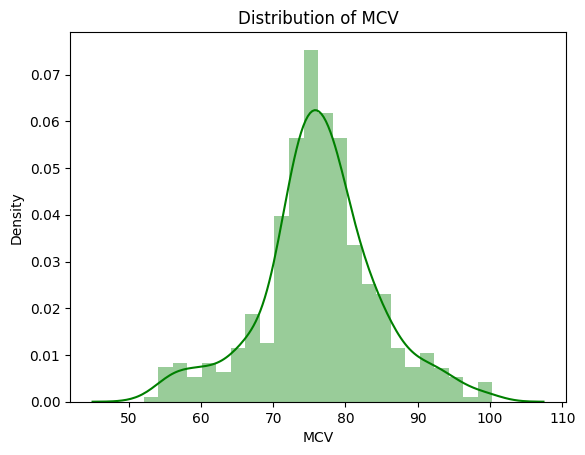

MCH's: Skew: -0.37534469975128826, : p-value0.0010


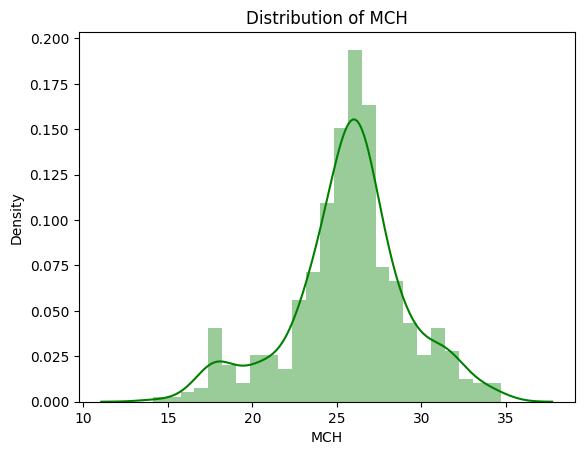

MCHC's: Skew: -0.5792795458609602, : p-value0.0000


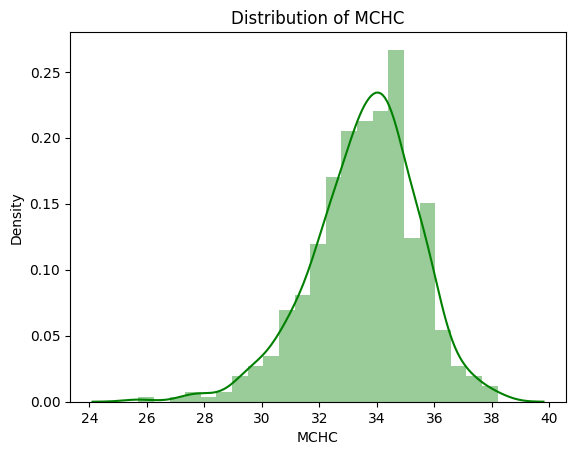

RDW's: Skew: 1.8451416973037318, : p-value0.0000


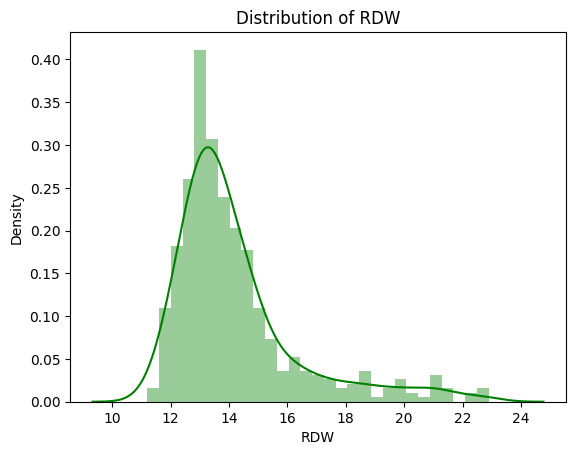

PLT's: Skew: 1.5141721202633192, : p-value0.0000


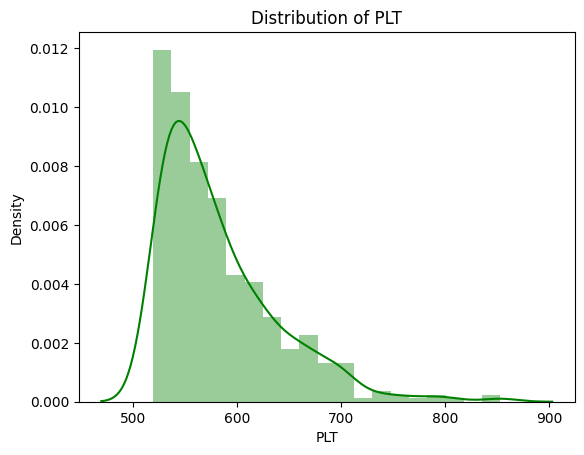

MPV's: Skew: -0.015236198166060881, : p-value0.8904


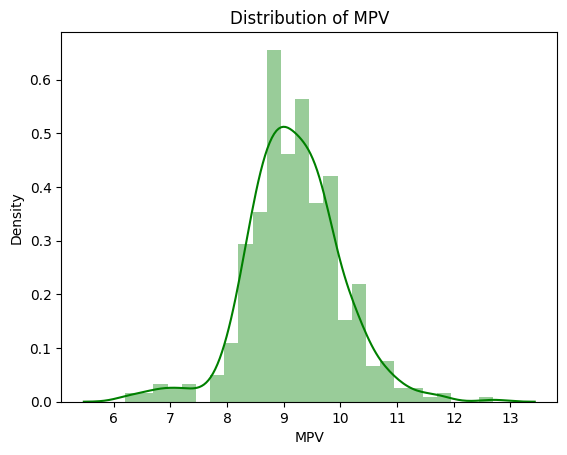

LENF's: Skew: 0.8051817100186471, : p-value0.0000


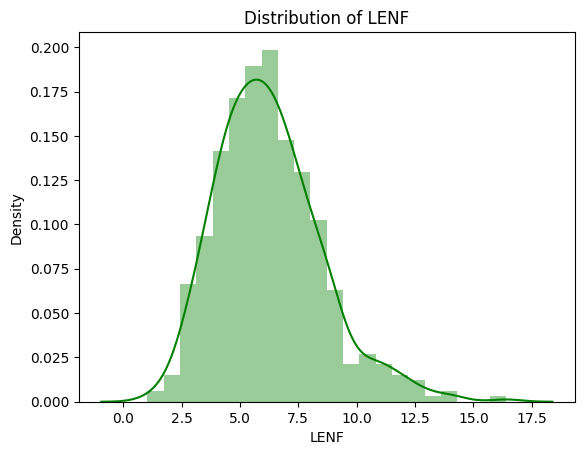

MONOSIT's: Skew: 1.328344091053124, : p-value0.0000


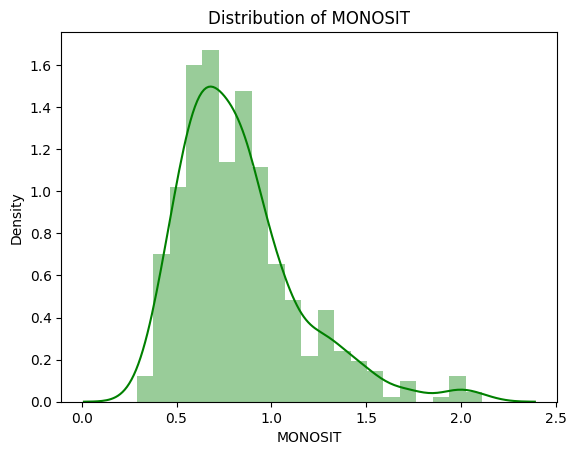

NOTROFIL's: Skew: 1.6732619958901824, : p-value0.0000


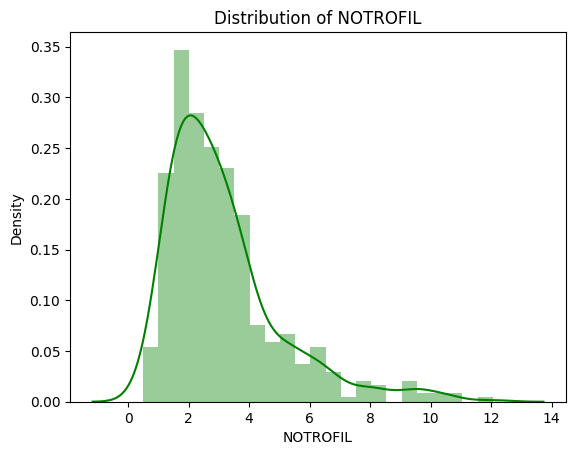

EOZINOFIL's: Skew: 1.6157790671404415, : p-value0.0000


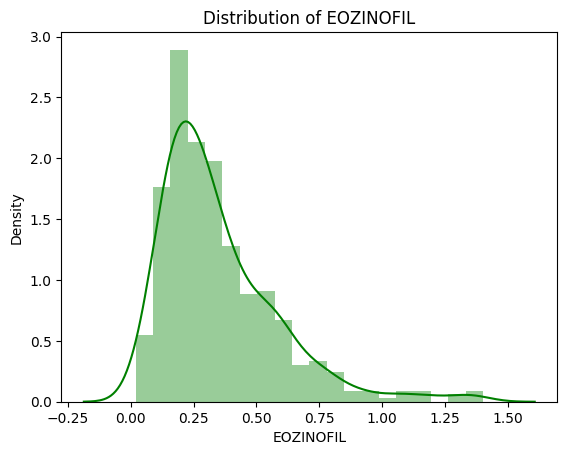

BAZOFIL's: Skew: 0.9841427374012115, : p-value0.0000


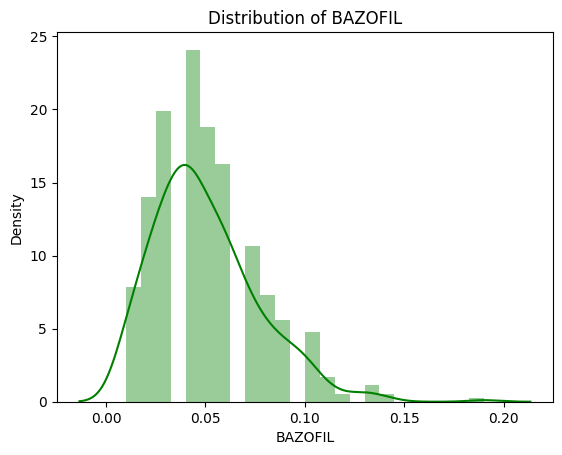

In [78]:
for col in num_cols:
    check_skew(df_diagnosis0,col)

In [79]:
for col in num_cols:
    print(f"{col} p-value: {shapiro(df_diagnosis0[col])[1]:.4f}")

WBC p-value: 0.0000
RBC p-value: 0.0002
HB p-value: 0.0813
HCT p-value: 0.3796
MCV p-value: 0.0000
MCH p-value: 0.0000
MCHC p-value: 0.0000
RDW p-value: 0.0000
PLT p-value: 0.0000
MPV p-value: 0.0000
LENF p-value: 0.0000
MONOSIT p-value: 0.0000
NOTROFIL p-value: 0.0000
EOZINOFIL p-value: 0.0000
BAZOFIL p-value: 0.0000


**While the HCT and HB variables were normally distributed, the other variables were not**

In [80]:
cat_cols1,num_cols1,cat_but_num1 = col_types(df_diagnosis1)

CAT COLS: 4
NUM COLS: 14
CAT but NUM COLS: 0
NUM but CAT COLS: 4


In [81]:
num_cols1

['WBC_1',
 'RBC_1',
 'HB_1',
 'HCT_1',
 'MCV_1',
 'MCH_1',
 'MCHC_1',
 'RDW_1',
 'PLT_1',
 'MPV_1',
 'LENF_1',
 'MONOSIT_1',
 'NOTROFIL_1',
 'EOZINOFIL_1']

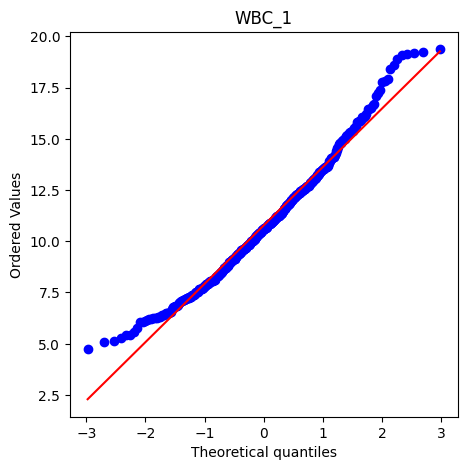

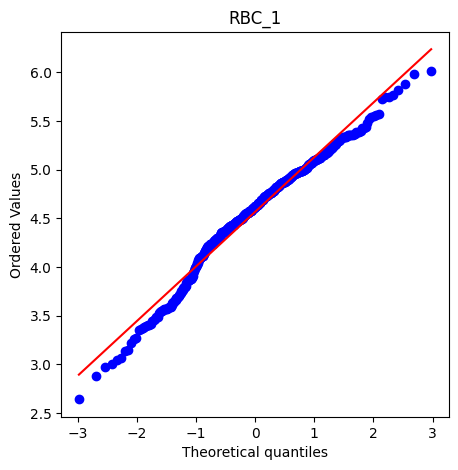

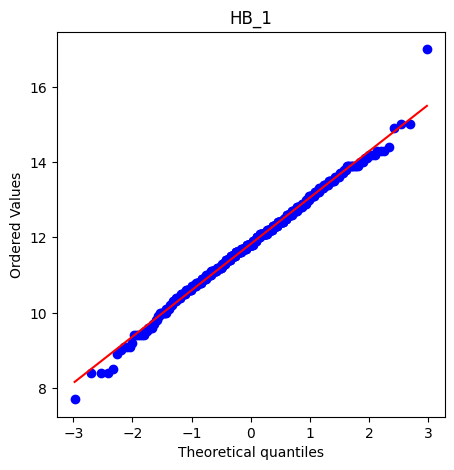

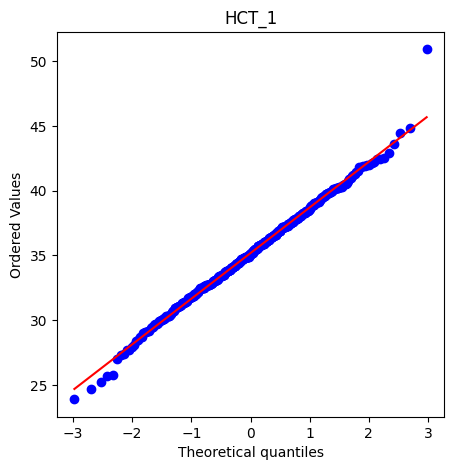

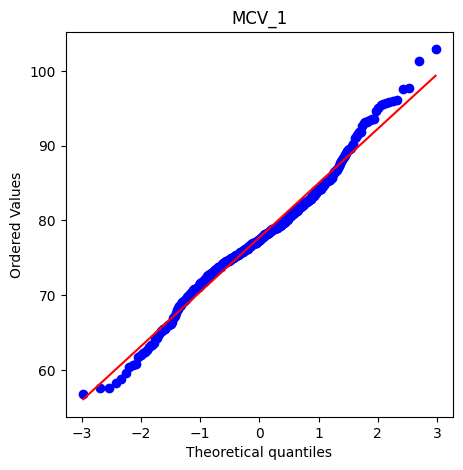

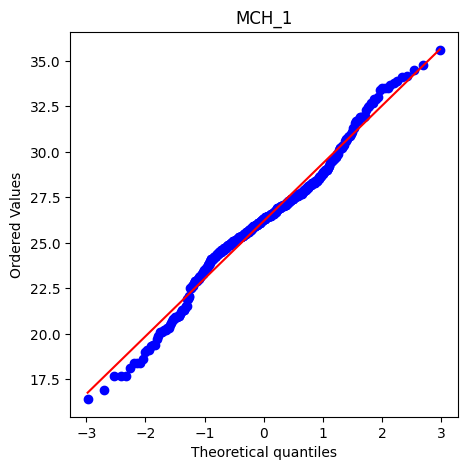

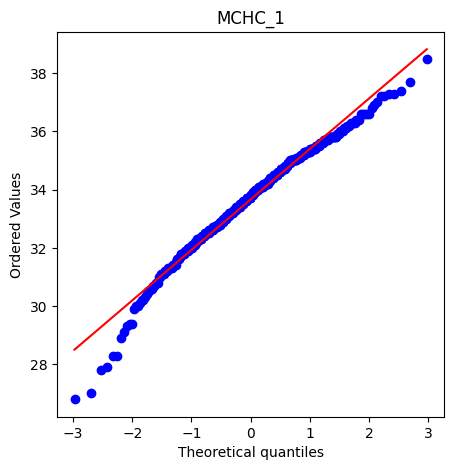

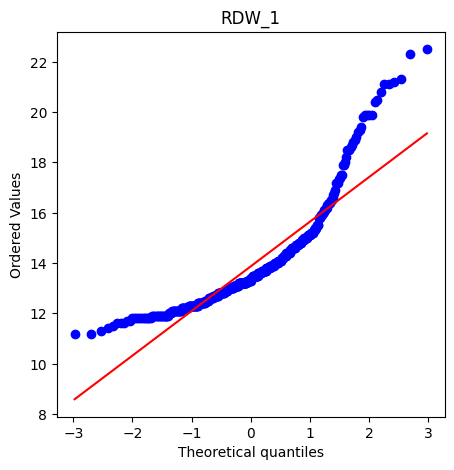

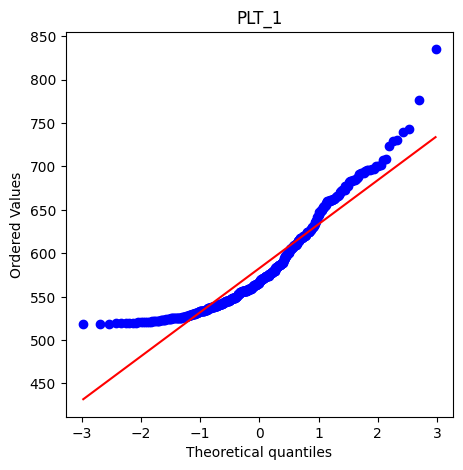

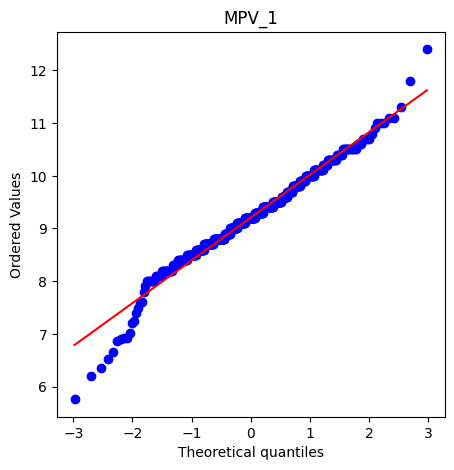

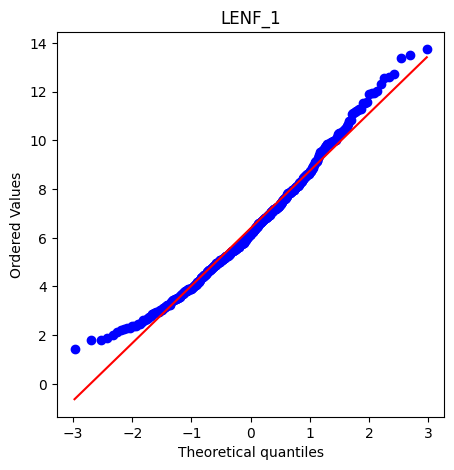

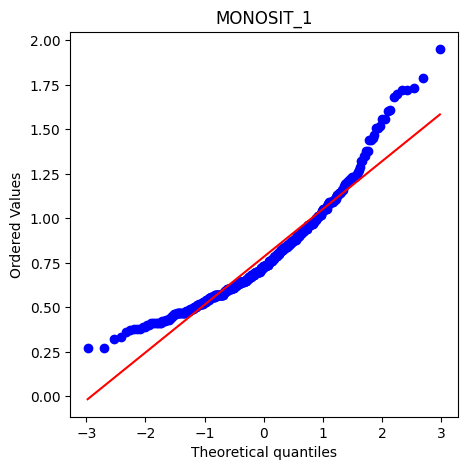

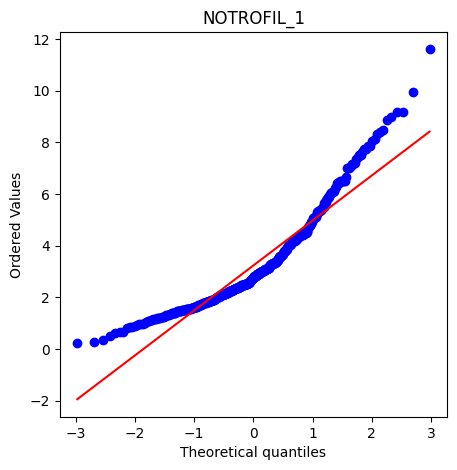

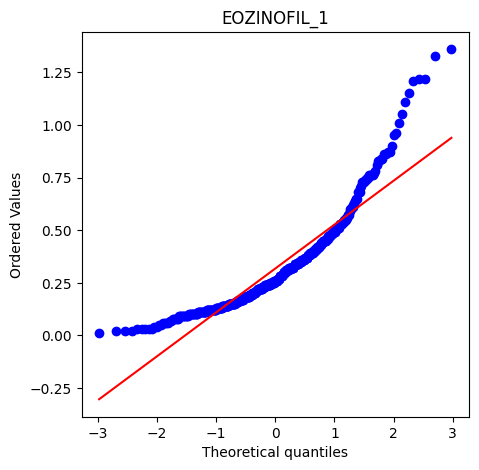

In [82]:
for col in num_cols1:
    plt.figure(figsize=(5,5))
    stats.probplot(df_diagnosis1[col],dist="norm",plot=pylab)
    plt.title(col)
    plt.show()

WBC_1's: Skew: 0.5042571877484124, : p-value0.0000


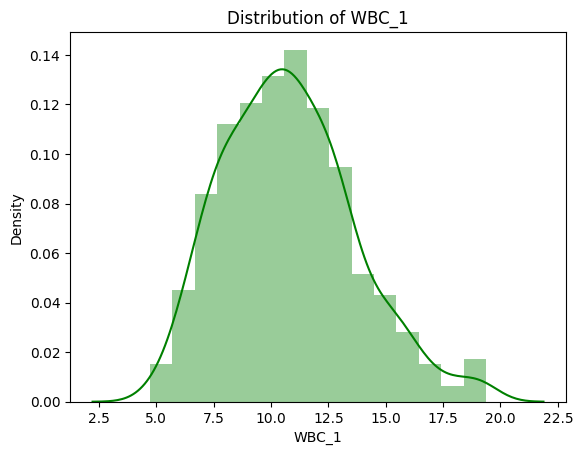

RBC_1's: Skew: -0.5245404884817185, : p-value0.0000


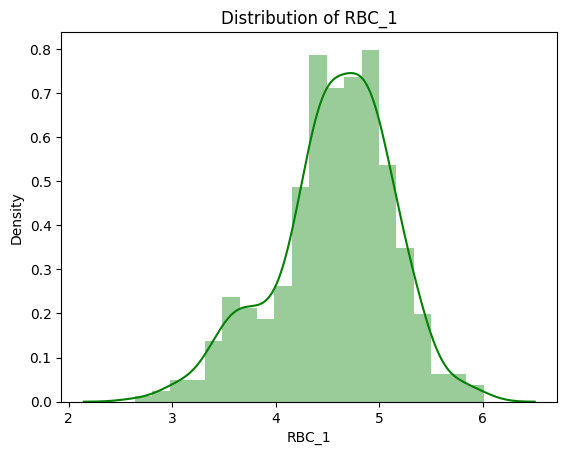

HB_1's: Skew: -0.0495534489223194, : p-value0.6543


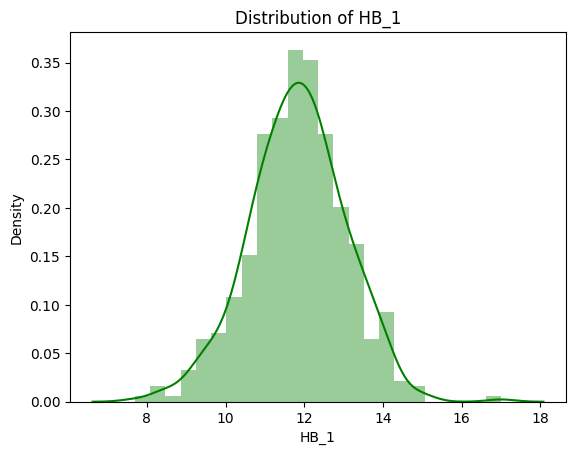

HCT_1's: Skew: 0.0505173040911653, : p-value0.6480


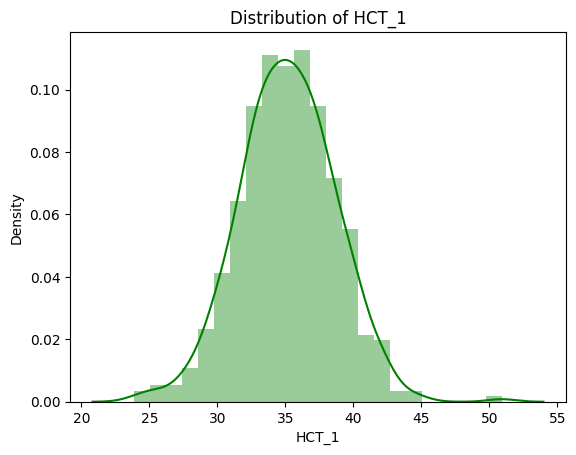

MCV_1's: Skew: 0.1645159403705844, : p-value0.1394


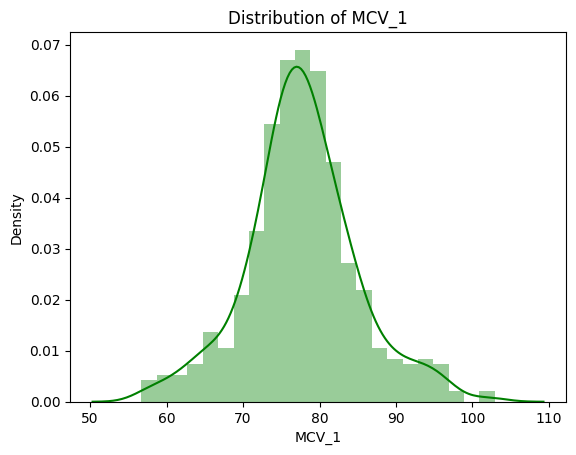

MCH_1's: Skew: -0.11728917356192985, : p-value0.2905


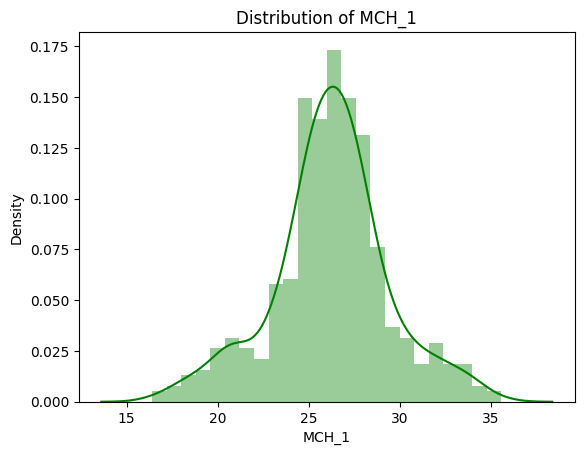

MCHC_1's: Skew: -0.5944430316958328, : p-value0.0000


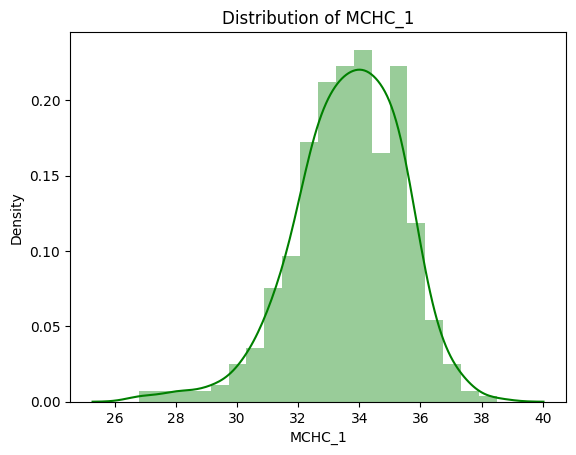

RDW_1's: Skew: 1.8363471979528008, : p-value0.0000


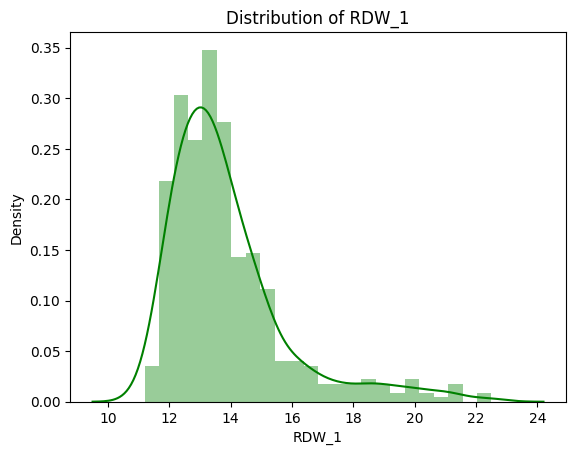

PLT_1's: Skew: 1.0809520127332921, : p-value0.0000


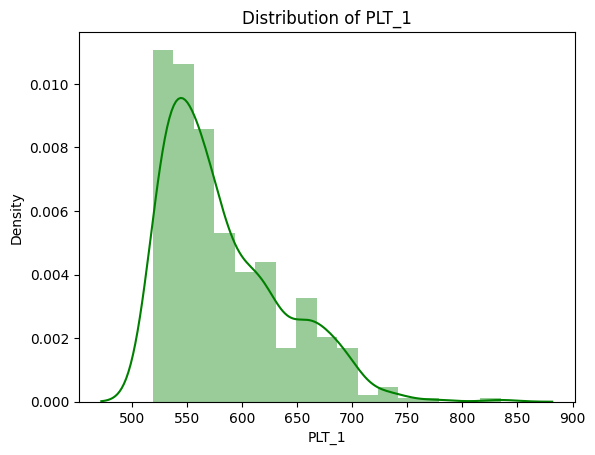

MPV_1's: Skew: -0.3098795477595152, : p-value0.0061


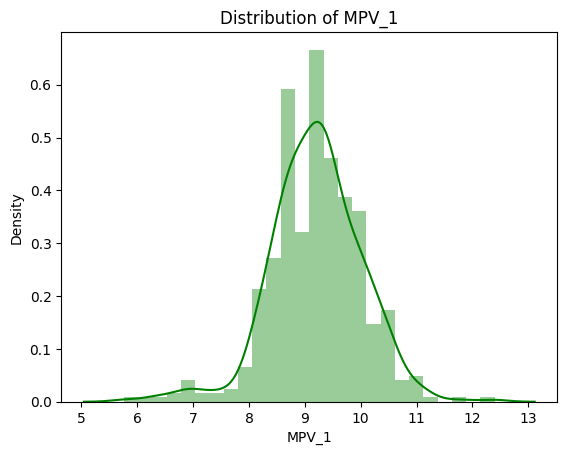

LENF_1's: Skew: 0.47120775592950787, : p-value0.0000


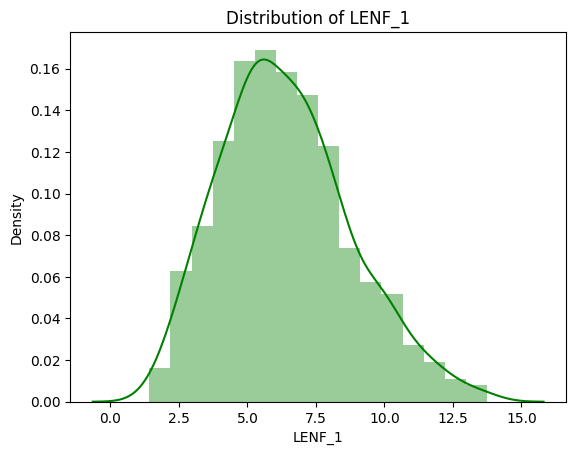

MONOSIT_1's: Skew: 1.121955862479602, : p-value0.0000


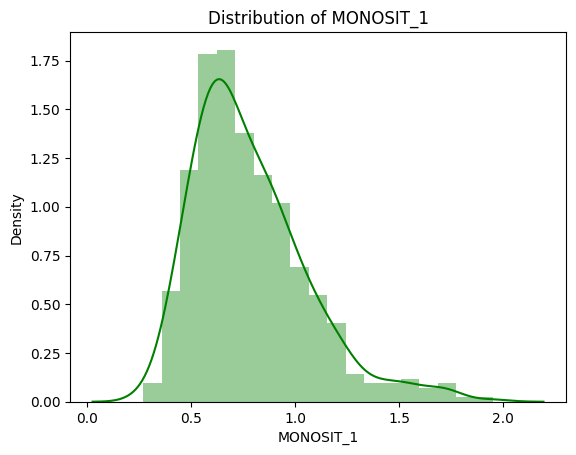

NOTROFIL_1's: Skew: 1.2549045807372312, : p-value0.0000


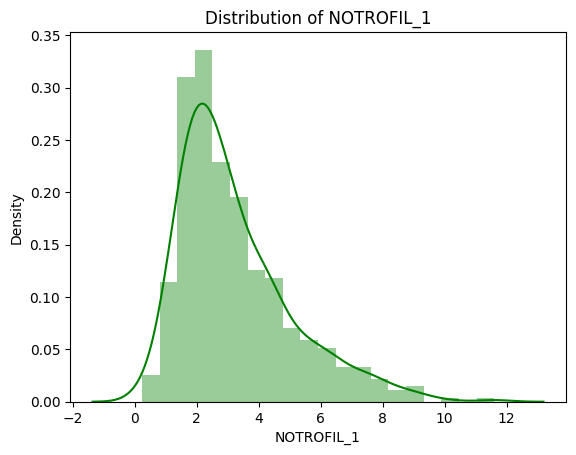

EOZINOFIL_1's: Skew: 1.6595292396174879, : p-value0.0000


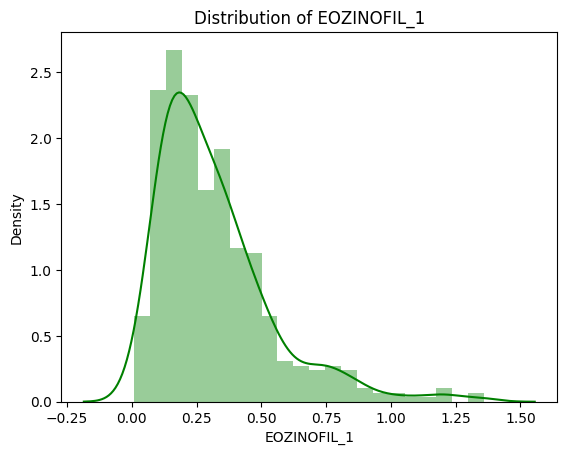

In [83]:
for col in num_cols1:
    check_skew(df_diagnosis1,col)

In [84]:
for col in num_cols1:
    print(f"{col} p-value: {shapiro(df_diagnosis1[col])[1]:.4f}")

WBC_1 p-value: 0.0000
RBC_1 p-value: 0.0000
HB_1 p-value: 0.0989
HCT_1 p-value: 0.1354
MCV_1 p-value: 0.0000
MCH_1 p-value: 0.0000
MCHC_1 p-value: 0.0000
RDW_1 p-value: 0.0000
PLT_1 p-value: 0.0000
MPV_1 p-value: 0.0000
LENF_1 p-value: 0.0000
MONOSIT_1 p-value: 0.0000
NOTROFIL_1 p-value: 0.0000
EOZINOFIL_1 p-value: 0.0000


**While the HCT and HB variables were normally distributed, the other variables were not**

**HYPOTHESES** </br> </br>
**H0: The variable is normally distributed** </br>
**H1: The variable isn't normally distributed**

**In both groups, the HCT and HB variables are normally distributed, while the other variables are not normally distributed.**

In [85]:
df_diagnosis0 = df_diagnosis0.reset_index(drop=True)
df_diagnosis1 = df_diagnosis1.reset_index(drop=True)

In [86]:
df_g=pd.concat([df_diagnosis0,df_diagnosis1],axis=1)
df_g.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,FACILITY_ID_1,AGE_CATEGORY_1,DIAGNOSIS_1,WBC_1,RBC_1,HB_1,HCT_1,MCV_1,MCH_1,MCHC_1,RDW_1,PLT_1,MPV_1,LENF_1,MONOSIT_1,NOTROFIL_1,EOZINOFIL_1,BAZOFIL_1
0,1,4,0,14.71,5.00,11.40,35.90,71.80,22.80,31.80,16.30,519.00,9.10,9.95,0.84,3.32,0.50,0.10,1,3,1,12.63,4.96,13.50,40.50,81.70,27.20,33.30,13.00,529.00,8.80,7.73,0.67,4.07,0.12,0.04
1,1,3,0,8.47,5.00,13.20,37.50,75.00,26.40,35.20,13.20,519.00,9.30,6.30,0.58,1.36,0.19,0.04,1,3,1,13.53,4.99,12.30,35.50,71.10,24.60,34.60,14.50,533.00,8.70,5.09,1.00,7.14,0.22,0.08
2,1,5,0,8.77,4.57,12.10,39.90,87.30,26.50,30.30,15.60,519.00,9.40,4.16,0.50,3.27,0.75,0.09,1,6,1,7.21,3.57,9.50,27.70,77.60,26.60,34.30,11.90,526.00,8.50,2.20,0.66,4.23,0.10,0.02
3,7,1,0,8.80,3.66,10.30,30.40,83.10,28.10,33.90,12.40,519.00,9.50,3.78,0.99,3.63,0.38,0.03,6,1,1,11.50,3.68,12.60,35.90,97.60,34.20,35.10,15.90,572.00,11.30,8.54,0.67,1.71,0.53,0.05
4,7,5,0,10.79,4.84,12.50,36.60,75.60,25.80,34.20,12.50,519.00,9.50,7.37,0.83,2.43,0.13,0.03,1,4,1,11.08,5.54,9.80,36.30,65.50,17.70,27.00,21.10,529.00,8.20,6.89,1.01,2.29,0.83,0.06


In [87]:
df_d0 = df[df["DIAGNOSIS"]==0]
df_d1 = df[df["DIAGNOSIS"]==1]

In [88]:
df_d0["GROUP"] = "A"
df_d1["GROUP"] = "B"

In [89]:
df_d0.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,GROUP
0,1,4,0,14.71,5.00,11.40,35.90,71.80,22.80,31.80,16.30,519.00,9.10,9.95,0.84,3.32,0.50,0.10,A
1,1,3,0,8.47,5.00,13.20,37.50,75.00,26.40,35.20,13.20,519.00,9.30,6.30,0.58,1.36,0.19,0.04,A
3,1,5,0,8.77,4.57,12.10,39.90,87.30,26.50,30.30,15.60,519.00,9.40,4.16,0.50,3.27,0.75,0.09,A
4,7,1,0,8.80,3.66,10.30,30.40,83.10,28.10,33.90,12.40,519.00,9.50,3.78,0.99,3.63,0.38,0.03,A
5,7,5,0,10.79,4.84,12.50,36.60,75.60,25.80,34.20,12.50,519.00,9.50,7.37,0.83,2.43,0.13,0.03,A


In [90]:
df_d1.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,GROUP
2,1,3,1,15.19,4.57,12.20,35.70,78.10,26.70,34.20,12.80,519.00,9.30,11.54,0.72,2.76,0.11,0.06,B
8,7,7,1,9.21,4.75,13.00,34.90,73.50,27.40,37.20,12.20,519.00,9.90,3.15,0.65,5.24,0.14,0.03,B
11,2,3,1,19.13,4.97,12.40,38.90,78.30,24.90,31.90,13.40,519.00,10.80,11.58,1.22,5.51,0.77,0.05,B
14,1,2,1,9.93,4.90,12.70,37.70,76.90,25.90,33.70,12.90,520.00,8.60,7.06,0.52,2.11,0.23,0.01,B
16,4,4,1,9.01,5.02,9.60,31.80,63.30,19.10,30.20,18.50,520.00,9.10,6.79,0.68,1.39,0.10,0.02,B


In [91]:
df_AB = pd.concat([df_d0,df_d1],axis=0,ignore_index=True)

In [92]:
df_AB.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,GROUP
0,1,4,0,14.71,5.00,11.40,35.90,71.80,22.80,31.80,16.30,519.00,9.10,9.95,0.84,3.32,0.50,0.10,A
1,1,3,0,8.47,5.00,13.20,37.50,75.00,26.40,35.20,13.20,519.00,9.30,6.30,0.58,1.36,0.19,0.04,A
2,1,5,0,8.77,4.57,12.10,39.90,87.30,26.50,30.30,15.60,519.00,9.40,4.16,0.50,3.27,0.75,0.09,A
3,7,1,0,8.80,3.66,10.30,30.40,83.10,28.10,33.90,12.40,519.00,9.50,3.78,0.99,3.63,0.38,0.03,A
4,7,5,0,10.79,4.84,12.50,36.60,75.60,25.80,34.20,12.50,519.00,9.50,7.37,0.83,2.43,0.13,0.03,A


In [93]:
df_AB.tail()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,GROUP
978,7,3,1,9.37,4.30,10.80,32.00,74.40,25.10,33.80,13.10,730.00,9.40,6.86,0.69,1.64,0.14,0.04,B
979,3,3,1,8.47,4.96,12.90,39.40,79.40,26.00,32.70,13.70,740.00,9.10,6.00,0.64,1.64,0.17,0.02,B
980,3,3,1,12.85,4.28,10.50,31.20,72.90,24.50,33.70,13.00,743.00,8.20,7.91,0.76,3.62,0.51,0.05,B
981,4,4,1,9.49,5.30,11.10,37.10,70.00,20.90,29.90,18.70,777.00,9.20,4.58,0.69,3.98,0.18,0.06,B
982,6,1,1,14.95,3.06,10.30,29.40,96.10,33.70,35.00,14.30,835.00,9.10,9.34,1.72,3.36,0.52,0.01,B


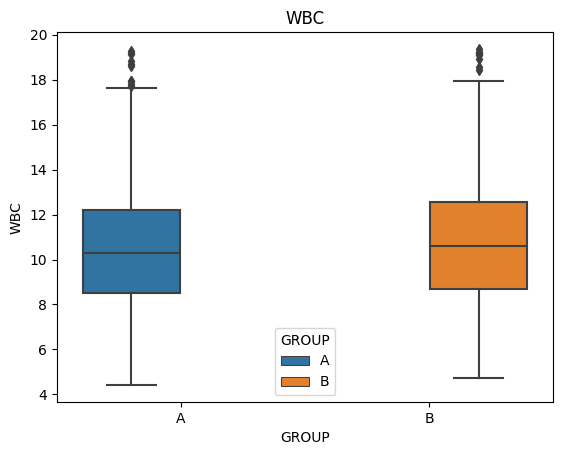

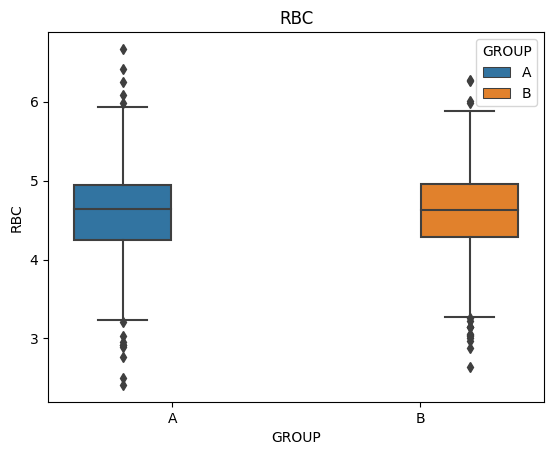

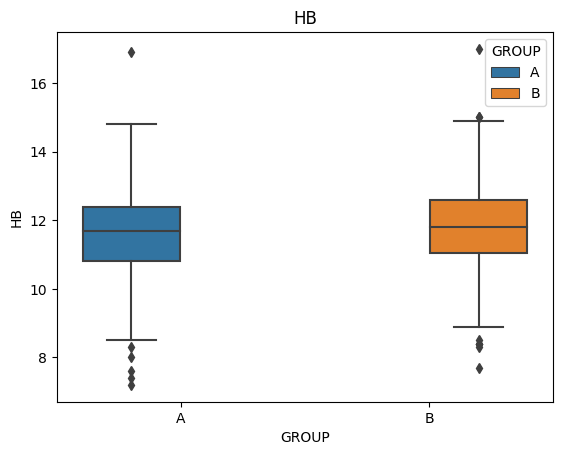

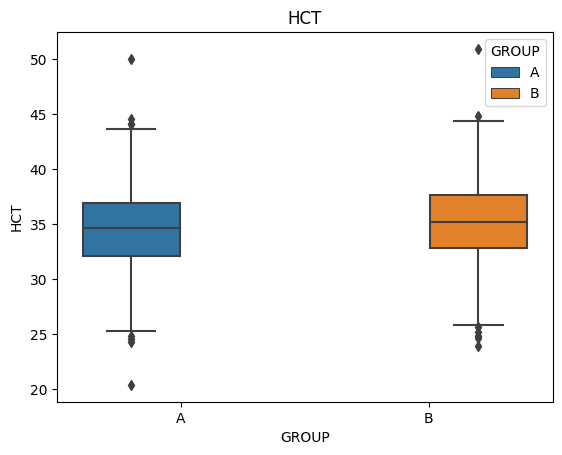

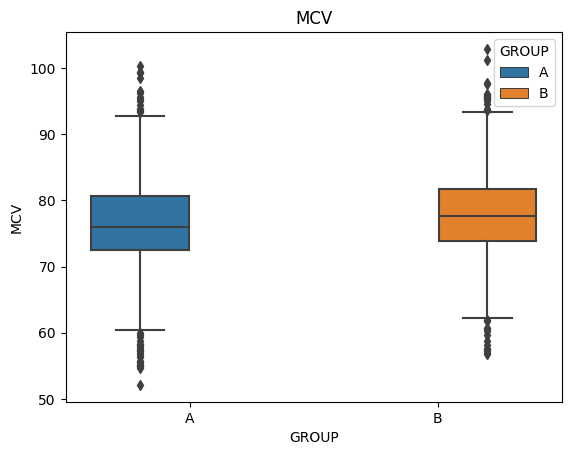

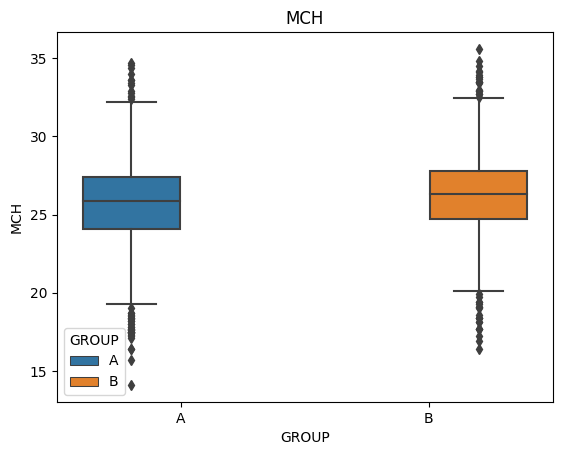

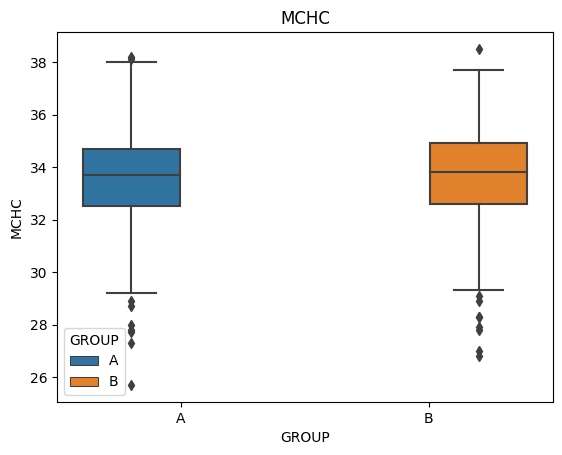

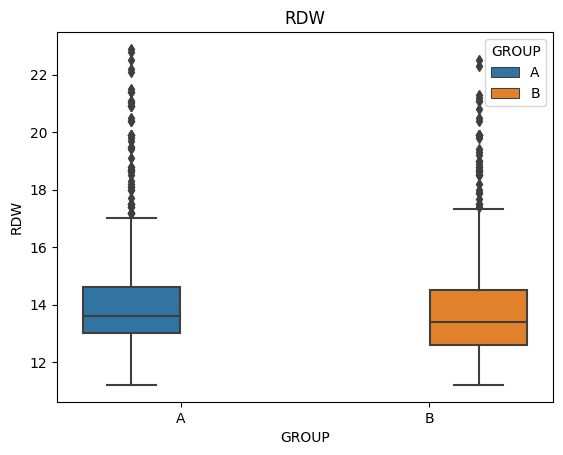

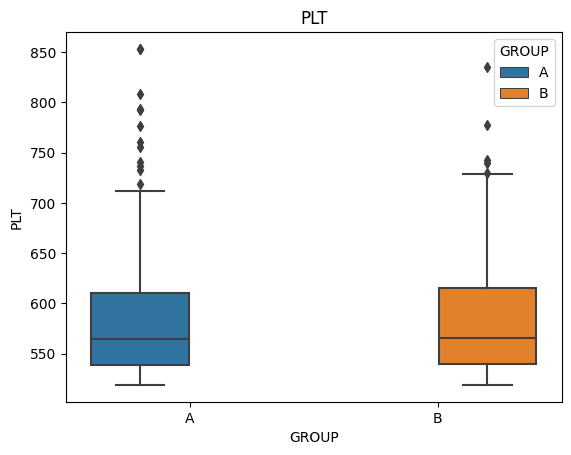

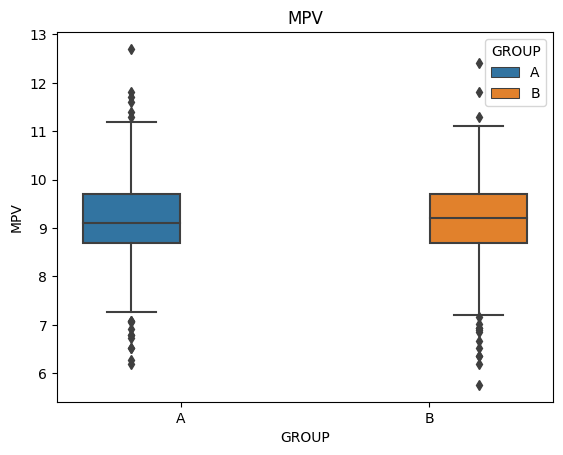

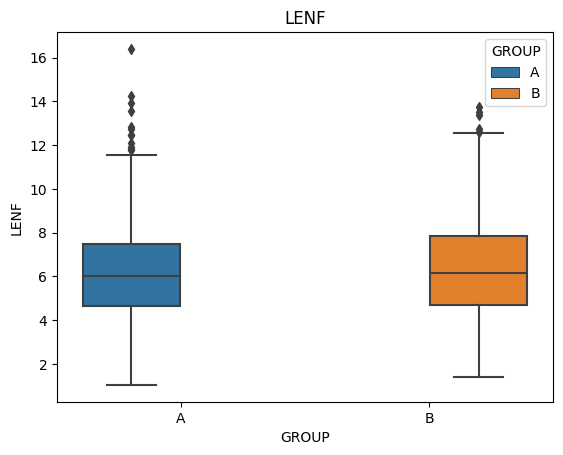

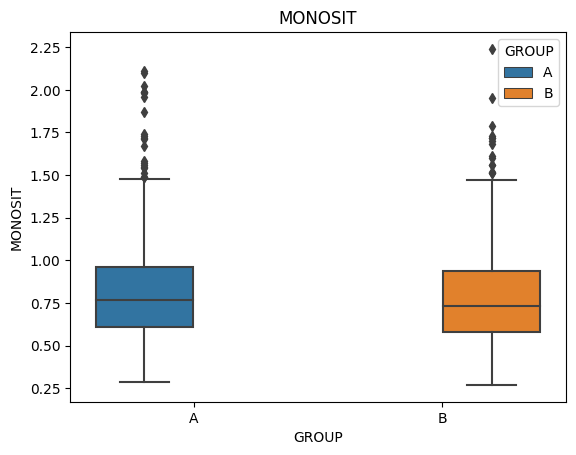

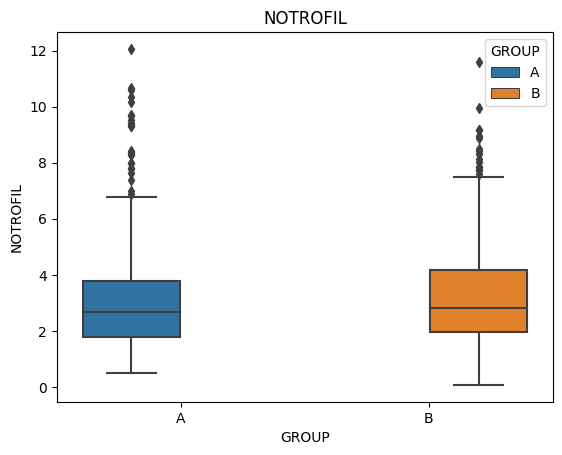

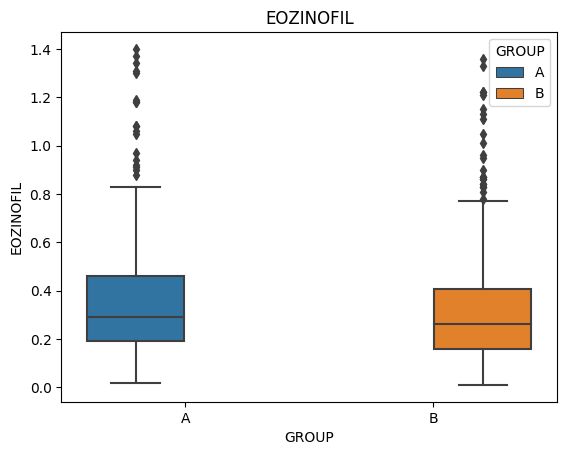

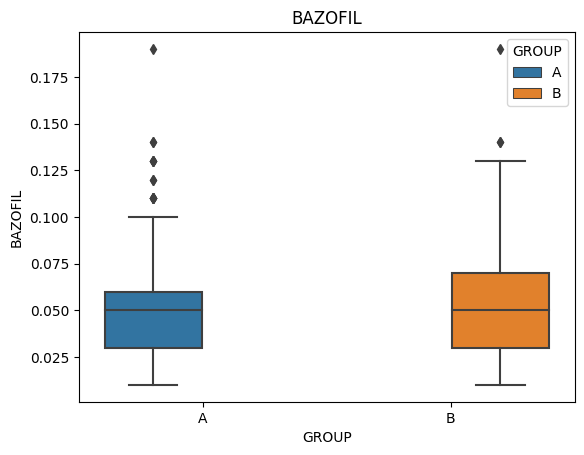

In [94]:
for col in num_cols:
    sns.boxplot(x="GROUP",y=col,data=df_AB,hue="GROUP")
    plt.title(col)
    plt.show()

In [95]:
check_df(df_g)

--------------------------------- SHAPE ---------------------------------
(476, 36)
--------------------------------- INFO ---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FACILITY_ID     476 non-null    int64  
 1   AGE_CATEGORY    476 non-null    int64  
 2   DIAGNOSIS       476 non-null    int64  
 3   WBC             476 non-null    float64
 4   RBC             476 non-null    float64
 5   HB              476 non-null    float64
 6   HCT             476 non-null    float64
 7   MCV             476 non-null    float64
 8   MCH             476 non-null    float64
 9   MCHC            476 non-null    float64
 10  RDW             476 non-null    float64
 11  PLT             476 non-null    float64
 12  MPV             476 non-null    float64
 13  LENF            476 non-null    float64
 14  MONOSIT      

In [96]:
df_AB.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,GROUP
0,1,4,0,14.71,5.00,11.40,35.90,71.80,22.80,31.80,16.30,519.00,9.10,9.95,0.84,3.32,0.50,0.10,A
1,1,3,0,8.47,5.00,13.20,37.50,75.00,26.40,35.20,13.20,519.00,9.30,6.30,0.58,1.36,0.19,0.04,A
2,1,5,0,8.77,4.57,12.10,39.90,87.30,26.50,30.30,15.60,519.00,9.40,4.16,0.50,3.27,0.75,0.09,A
3,7,1,0,8.80,3.66,10.30,30.40,83.10,28.10,33.90,12.40,519.00,9.50,3.78,0.99,3.63,0.38,0.03,A
4,7,5,0,10.79,4.84,12.50,36.60,75.60,25.80,34.20,12.50,519.00,9.50,7.37,0.83,2.43,0.13,0.03,A


In [97]:
df_g.head()

,FACILITY_ID,AGE_CATEGORY,DIAGNOSIS,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL,FACILITY_ID_1,AGE_CATEGORY_1,DIAGNOSIS_1,WBC_1,RBC_1,HB_1,HCT_1,MCV_1,MCH_1,MCHC_1,RDW_1,PLT_1,MPV_1,LENF_1,MONOSIT_1,NOTROFIL_1,EOZINOFIL_1,BAZOFIL_1
0,1,4,0,14.71,5.00,11.40,35.90,71.80,22.80,31.80,16.30,519.00,9.10,9.95,0.84,3.32,0.50,0.10,1,3,1,12.63,4.96,13.50,40.50,81.70,27.20,33.30,13.00,529.00,8.80,7.73,0.67,4.07,0.12,0.04
1,1,3,0,8.47,5.00,13.20,37.50,75.00,26.40,35.20,13.20,519.00,9.30,6.30,0.58,1.36,0.19,0.04,1,3,1,13.53,4.99,12.30,35.50,71.10,24.60,34.60,14.50,533.00,8.70,5.09,1.00,7.14,0.22,0.08
2,1,5,0,8.77,4.57,12.10,39.90,87.30,26.50,30.30,15.60,519.00,9.40,4.16,0.50,3.27,0.75,0.09,1,6,1,7.21,3.57,9.50,27.70,77.60,26.60,34.30,11.90,526.00,8.50,2.20,0.66,4.23,0.10,0.02
3,7,1,0,8.80,3.66,10.30,30.40,83.10,28.10,33.90,12.40,519.00,9.50,3.78,0.99,3.63,0.38,0.03,6,1,1,11.50,3.68,12.60,35.90,97.60,34.20,35.10,15.90,572.00,11.30,8.54,0.67,1.71,0.53,0.05
4,7,5,0,10.79,4.84,12.50,36.60,75.60,25.80,34.20,12.50,519.00,9.50,7.37,0.83,2.43,0.13,0.03,1,4,1,11.08,5.54,9.80,36.30,65.50,17.70,27.00,21.10,529.00,8.20,6.89,1.01,2.29,0.83,0.06


In [98]:
num_cols

['WBC',
 'RBC',
 'HB',
 'HCT',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'PLT',
 'MPV',
 'LENF',
 'MONOSIT',
 'NOTROFIL',
 'EOZINOFIL',
 'BAZOFIL']

In [99]:
for col in num_cols:
    if col + "_1" in df_g.columns:  
        p_value = stats.levene(df_g[col], df_g[col + "_1"])[1]
        print(f"{col} p-value: {p_value:.4f}")
    else:
        print(f"{col + '_1'} the column does not exist.")

WBC p-value: 0.4874
RBC p-value: 0.1430
HB p-value: 0.1942
HCT p-value: 0.2267
MCV p-value: 0.1199
MCH p-value: 0.2690
MCHC p-value: 0.6169
RDW p-value: 0.3919
PLT p-value: 0.8302
MPV p-value: 0.7575
LENF p-value: 0.1069
MONOSIT p-value: 0.0918
NOTROFIL p-value: 0.8576
EOZINOFIL p-value: 0.4274
BAZOFIL p-value: 0.4992


**The variances of the variables are homogeneous in both groups.**

In [100]:
non_parametric = [col for col in num_cols if col not in ["HCT","HB"]]

In [101]:
non_parametric

['WBC',
 'RBC',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'PLT',
 'MPV',
 'LENF',
 'MONOSIT',
 'NOTROFIL',
 'EOZINOFIL',
 'BAZOFIL']

In [102]:
parametric = [col for col in num_cols if col in ["HCT","HB"]]

In [103]:
parametric

['HB', 'HCT']

In [104]:
for col in non_parametric:
    if col + "_1" in df_g.columns:  
        p_value = stats.mannwhitneyu(df_g[col], df_g[col + "_1"])[1]
        print(f"{col} p-value: {p_value:.4f}")
    else:
        print(f"{col + '_1'} the column does not exist.")

WBC p-value: 0.2219
RBC p-value: 0.9223
MCV p-value: 0.0046
MCH p-value: 0.0177
MCHC p-value: 0.4853
RDW p-value: 0.0022
PLT p-value: 0.5339
MPV p-value: 0.3969
LENF p-value: 0.3271
MONOSIT p-value: 0.0491
NOTROFIL p-value: 0.1936
EOZINOFIL p-value: 0.0100
BAZOFIL p-value: 0.0256


In [105]:
df_diagnosis1.columns

Index(['FACILITY_ID_1', 'AGE_CATEGORY_1', 'DIAGNOSIS_1', 'WBC_1', 'RBC_1', 'HB_1', 'HCT_1', 'MCV_1', 'MCH_1', 'MCHC_1', 'RDW_1', 'PLT_1', 'MPV_1', 'LENF_1', 'MONOSIT_1', 'NOTROFIL_1', 'EOZINOFIL_1',
       'BAZOFIL_1'],
      dtype='object')

**HYPOTHESES** </br> </br>
**H0: There is no significant difference between the median values of the two independent groups**</br>
**H1: There is a significant difference between the median values of the two independent groups.**

WBC , RBC , MCHC , PLT , MPV , LENF , NOTROFIL: If p > 0.05, the null hypothesis cannot be rejected. There is no difference between the groups. 

MCV , MCH , RDW , MONOSIT , EOZINOFIL , BAZOFIL : If p < 0.05, the null hypothesis is rejected. There is a difference between the groups.

**The results of the Mann-Whitney U test indicate significant differences between the two independent groups, with a 95% confidence level:**</br> </br> 

**MCV and MCH: The median values for the "Diagnosis" group 1 are significantly higher than those for group 0. This suggests that individuals in group 1 may be in a healthier state compared to those in group 0.** </br> 

**RDW, MONOSIT, EOZINOFIL, and BAZOFIL: In contrast, the median values for these variables are significantly higher in the "Diagnosis" group 0. This implies that individuals in group 0 may exhibit signs of inflammation or abnormal conditions.** 

In [106]:
df_AB.groupby("GROUP")[num_cols].median()

,WBC,RBC,HB,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,LENF,MONOSIT,NOTROFIL,EOZINOFIL,BAZOFIL
GROUP,,,,,,,,,,,,,,,
A,10.30,4.64,11.70,34.60,76.05,25.90,33.70,13.60,565.00,9.10,6.03,0.77,2.66,0.29,0.05
B,10.62,4.63,11.80,35.20,77.60,26.30,33.80,13.40,566.00,9.20,6.17,0.73,2.80,0.26,0.05


****

In [107]:
for col in parametric:
    if col + "_1" in df_g.columns:  
        p_value = stats.ttest_ind(df_g[col], df_g[col + "_1"],equal_var=True)[1]
        print(f"{col} p-value: {p_value:.4f}")
    else:
        print(f"{col + '_1'} the column does not exist.")

HB p-value: 0.0064
HCT p-value: 0.0117


**Hypotheses**</br> </br>

**Null Hypothesis (H0): There is no significant difference between the mean values of the two independent groups.**</br>

**Alternative Hypothesis (H1): There is a significant difference between the mean values of the two independent groups.**

**HB and HCT : If p < 0.05, the null hypothesis is rejected. There is a difference between the groups.**

In [108]:
df_AB.groupby("GROUP")[["HB","HCT"]].mean()

,HB,HCT
GROUP,,
A,11.60,34.58
B,11.83,35.22


**The results of the independent two-sample t-test indicate that we reject the null hypothesis  at the 95% confidence level. This suggests that there is a significant difference in mean values for HB and HCT between the two groups.**</br>

**Specifically, the mean values for the "Diagnosis" group 1 are higher than those for group 0, indicating that individuals in group 1 are likely in a healthier state. Thus, these findings support the conclusion that health status differs significantly between the two groups, with group 1 exhibiting better hemoglobin and hematocrit levels.**

# As a result, we have determined which group is diseased and which group is healthy using the AB test. Group 0 represents the values of individuals diagnosed as sick, while Group 1 represents the values of individuals who are not sick.